In [1]:
#MAIN SIN CURVE CODE

Training the ANN...
Epoch 0/5000 - Training Error: 1.36869, Validation Error: 1.45122
Epoch 100/5000 - Training Error: 0.43360, Validation Error: 0.44903
Epoch 200/5000 - Training Error: 0.42976, Validation Error: 0.44306
Epoch 300/5000 - Training Error: 0.42801, Validation Error: 0.44114
Epoch 400/5000 - Training Error: 0.42635, Validation Error: 0.43954
Epoch 500/5000 - Training Error: 0.42474, Validation Error: 0.43795
Epoch 600/5000 - Training Error: 0.42317, Validation Error: 0.43638
Epoch 700/5000 - Training Error: 0.42162, Validation Error: 0.43478
Epoch 800/5000 - Training Error: 0.42009, Validation Error: 0.43333
Epoch 900/5000 - Training Error: 0.41855, Validation Error: 0.43189
Epoch 1000/5000 - Training Error: 0.41701, Validation Error: 0.43024
Epoch 1100/5000 - Training Error: 0.41543, Validation Error: 0.42868
Epoch 1200/5000 - Training Error: 0.41383, Validation Error: 0.42716
Epoch 1300/5000 - Training Error: 0.41218, Validation Error: 0.42554
Epoch 1400/5000 - Training

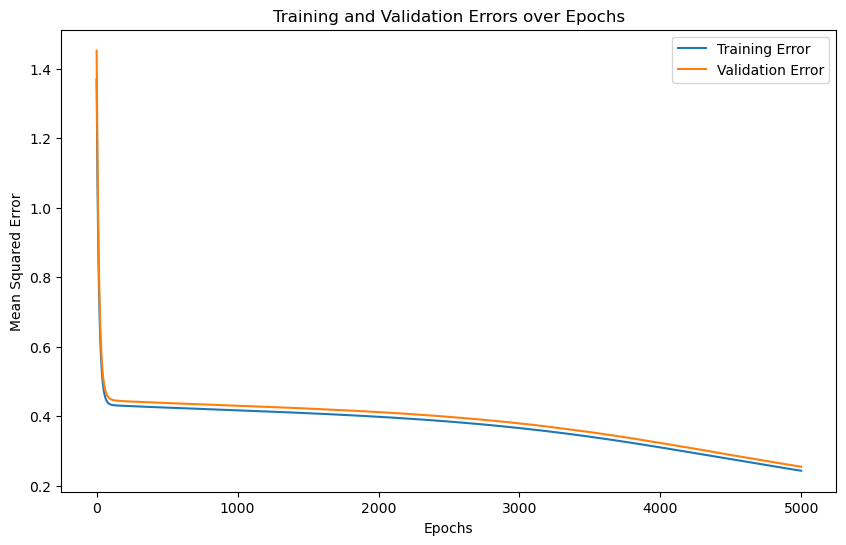

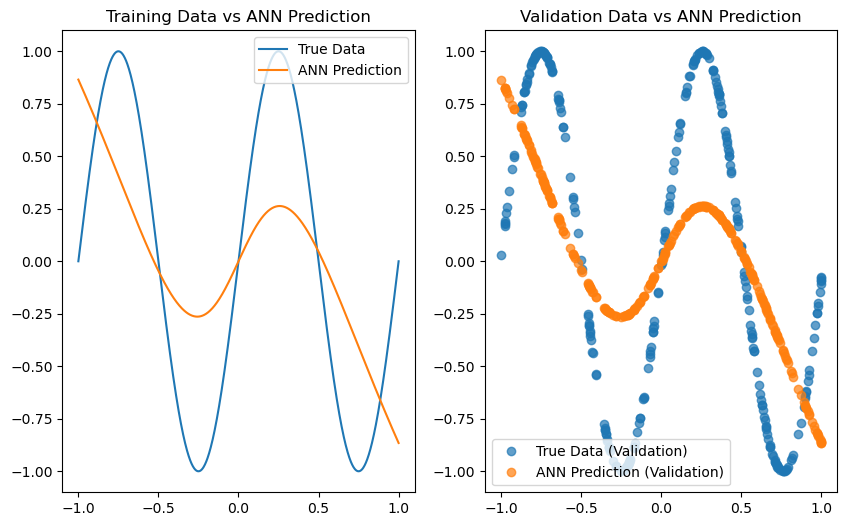

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    return x_train, y_train, x_val, y_val

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2  # Linear activation for output layer
        return self.a2

    def backprop(self, x, y):
        m = x.shape[0]  

        output_error = self.a2 - y.reshape(-1, 1)

        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        self.weights_hidden_output -= self.learning_rate * np.dot(self.a1.T, output_error) / m
        self.bias_output -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True) / m
        self.weights_input_hidden -= self.learning_rate * np.dot(x.T, hidden_error) / m
        self.bias_hidden -= self.learning_rate * np.sum(hidden_error, axis=0, keepdims=True) / m

    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):

            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

def plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train, label='True Data')
    plt.plot(x_train, predictions_train, label='ANN Prediction')
    plt.title("Training Data vs ANN Prediction")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_val, y_val, 'o', label='True Data (Validation)', alpha=0.7)
    plt.plot(x_val, predictions_val, 'o', label='ANN Prediction (Validation)', alpha=0.7)
    plt.title("Validation Data vs ANN Prediction")
    plt.legend()

    plt.show()

def main():
    x_train, y_train, x_val, y_val = generate_toy_data()

    x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) * 2 - 1
    x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val)) * 2 - 1

    input_size = 1
    hidden_size = 10  
    output_size = 1
    learning_rate = 0.001

    ann = ANN(input_size, hidden_size, output_size, learning_rate)

    print("Training the ANN...")
    train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=5000)

    plot_errors(train_errors, val_errors)

    predictions_train = ann.forward(x_train.reshape(-1, 1))
    predictions_val = ann.forward(x_val.reshape(-1, 1))

    plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val)

if __name__ == "__main__":
    main()


In [3]:
#CODE FOR MINI BATCH TRAINING


Training with batch size: 1
Epoch 0/1000 - Training Error: 0.49554, Validation Error: 0.49079
Epoch 100/1000 - Training Error: 0.13704, Validation Error: 0.14412
Epoch 200/1000 - Training Error: 0.09111, Validation Error: 0.09482
Epoch 300/1000 - Training Error: 0.07784, Validation Error: 0.08068
Epoch 400/1000 - Training Error: 0.07286, Validation Error: 0.07508
Epoch 500/1000 - Training Error: 0.07024, Validation Error: 0.07234
Epoch 600/1000 - Training Error: 0.06835, Validation Error: 0.07030
Epoch 700/1000 - Training Error: 0.06637, Validation Error: 0.06823
Epoch 800/1000 - Training Error: 0.06454, Validation Error: 0.06629
Epoch 900/1000 - Training Error: 0.06249, Validation Error: 0.06420


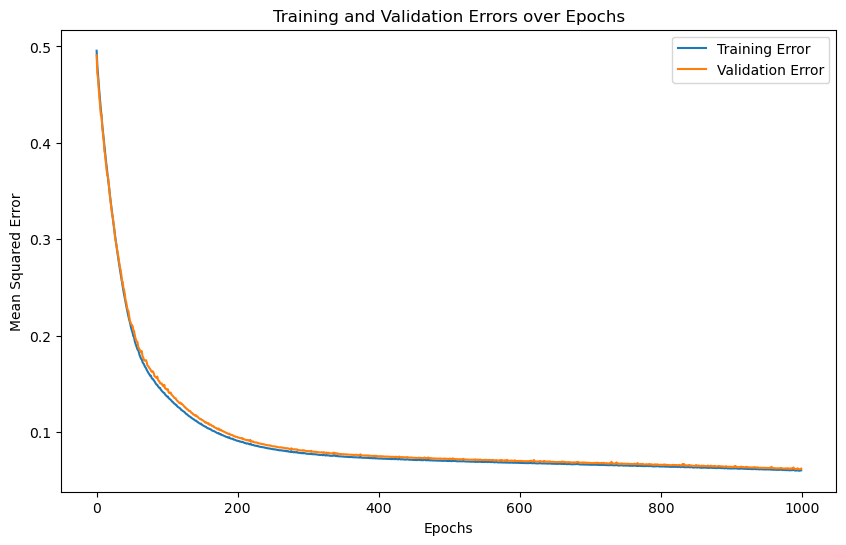

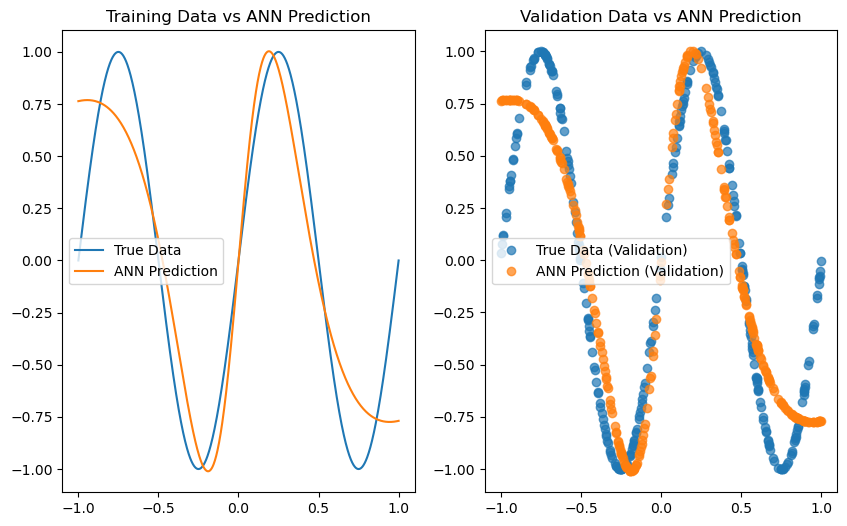


Training with batch size: 64
Epoch 0/1000 - Training Error: 0.06056, Validation Error: 0.06230
Epoch 100/1000 - Training Error: 0.06006, Validation Error: 0.06165
Epoch 200/1000 - Training Error: 0.06001, Validation Error: 0.06159
Epoch 300/1000 - Training Error: 0.05996, Validation Error: 0.06154
Epoch 400/1000 - Training Error: 0.05991, Validation Error: 0.06149
Epoch 500/1000 - Training Error: 0.05986, Validation Error: 0.06143
Epoch 600/1000 - Training Error: 0.05980, Validation Error: 0.06138
Epoch 700/1000 - Training Error: 0.05975, Validation Error: 0.06132
Epoch 800/1000 - Training Error: 0.05969, Validation Error: 0.06126
Epoch 900/1000 - Training Error: 0.05964, Validation Error: 0.06121


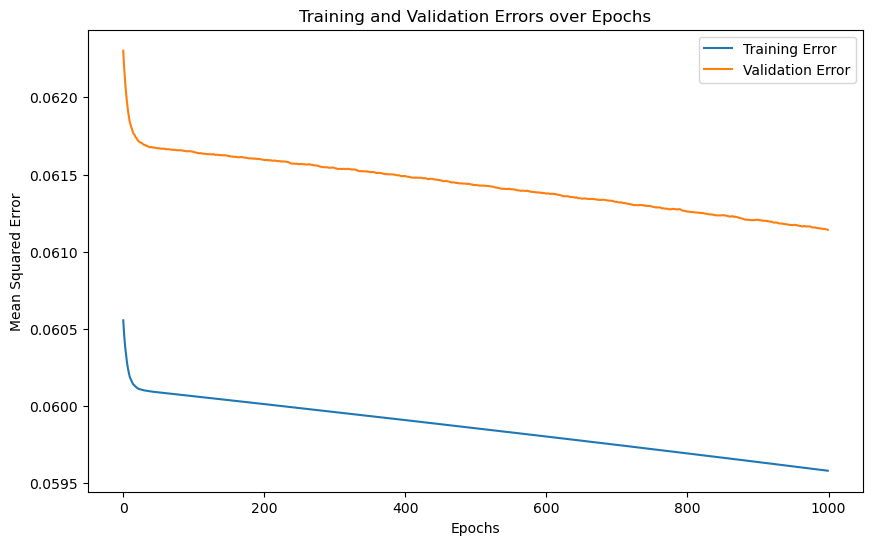

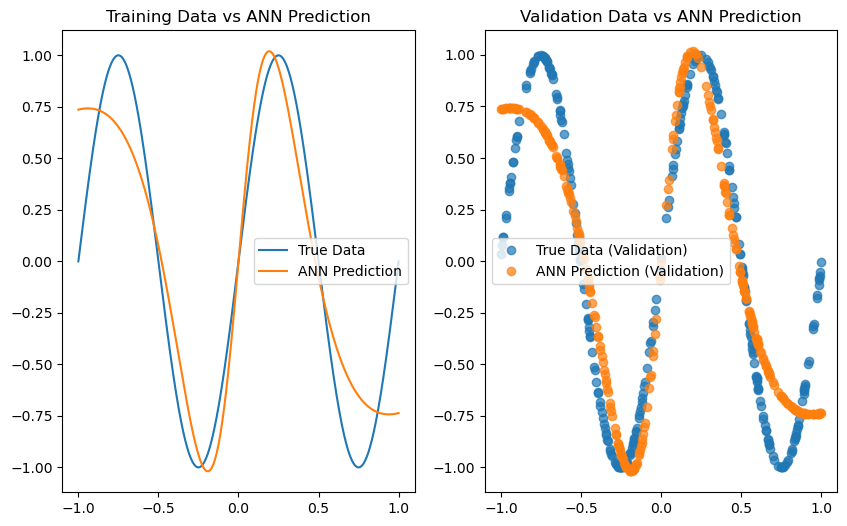


Training with batch size: 256
Epoch 0/1000 - Training Error: 0.05958, Validation Error: 0.06114
Epoch 100/1000 - Training Error: 0.05957, Validation Error: 0.06113
Epoch 200/1000 - Training Error: 0.05955, Validation Error: 0.06111
Epoch 300/1000 - Training Error: 0.05954, Validation Error: 0.06110
Epoch 400/1000 - Training Error: 0.05952, Validation Error: 0.06109
Epoch 500/1000 - Training Error: 0.05951, Validation Error: 0.06107
Epoch 600/1000 - Training Error: 0.05950, Validation Error: 0.06105
Epoch 700/1000 - Training Error: 0.05948, Validation Error: 0.06104
Epoch 800/1000 - Training Error: 0.05947, Validation Error: 0.06103
Epoch 900/1000 - Training Error: 0.05945, Validation Error: 0.06101


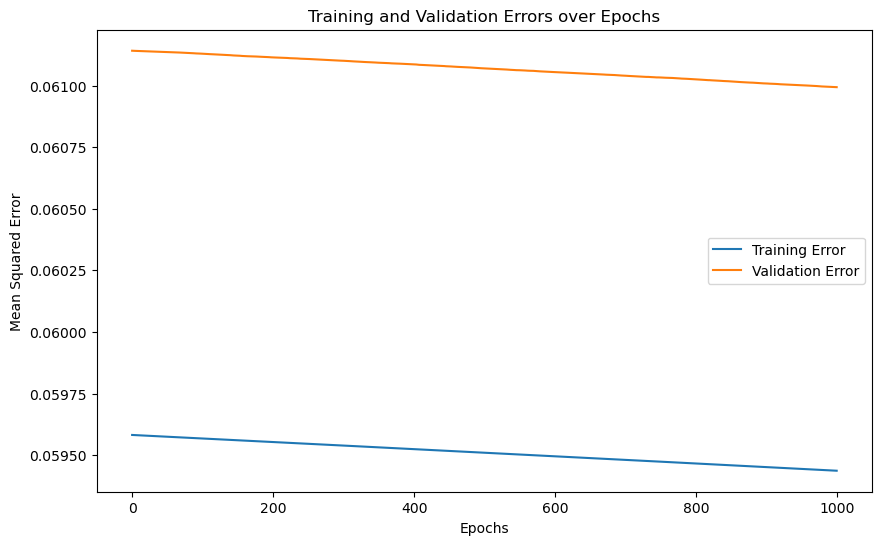

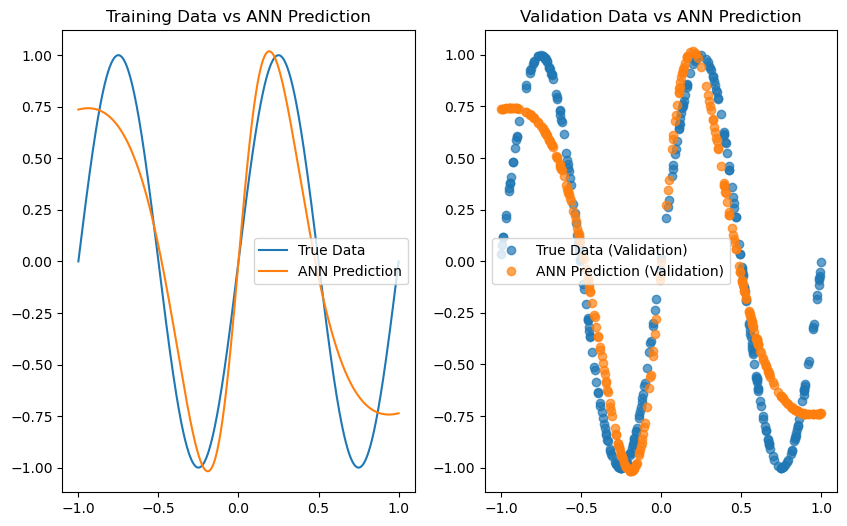


Training with batch size: full
Epoch 0/1000 - Training Error: 0.05944, Validation Error: 0.06099
Epoch 100/1000 - Training Error: 0.05943, Validation Error: 0.06099
Epoch 200/1000 - Training Error: 0.05943, Validation Error: 0.06099
Epoch 300/1000 - Training Error: 0.05943, Validation Error: 0.06098
Epoch 400/1000 - Training Error: 0.05942, Validation Error: 0.06098
Epoch 500/1000 - Training Error: 0.05942, Validation Error: 0.06097
Epoch 600/1000 - Training Error: 0.05941, Validation Error: 0.06097
Epoch 700/1000 - Training Error: 0.05941, Validation Error: 0.06097
Epoch 800/1000 - Training Error: 0.05941, Validation Error: 0.06096
Epoch 900/1000 - Training Error: 0.05940, Validation Error: 0.06096


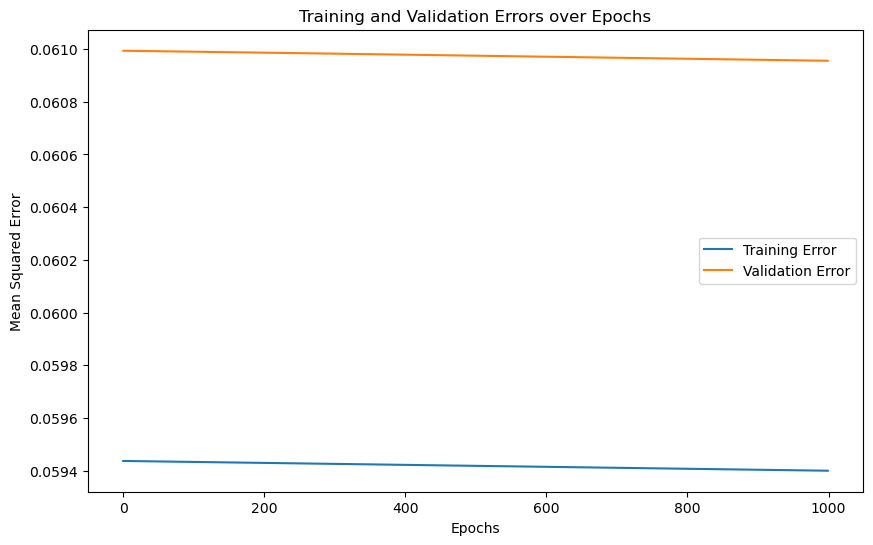

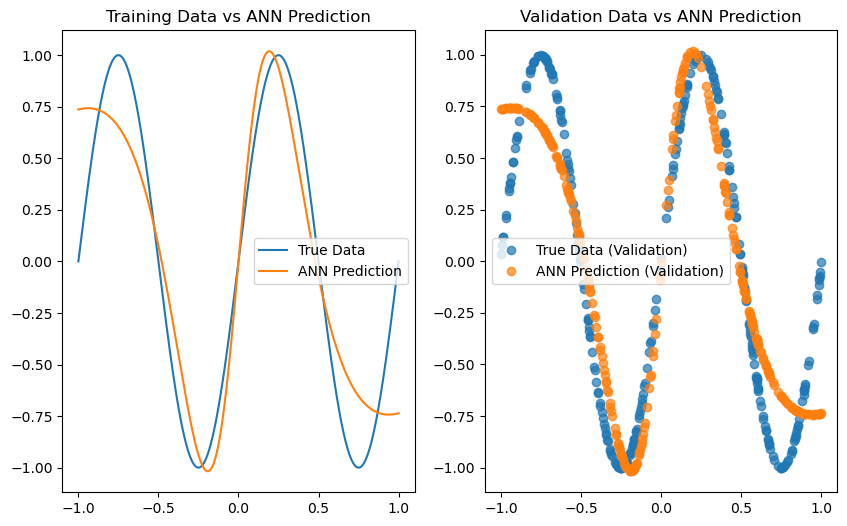

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    # Validation data
    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    return x_train, y_train, x_val, y_val

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden  # Matrix multiplication for batch input
        self.a1 = tanh(self.z1)

        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2  
        return self.a2

    def backprop(self, x, y):
        m = x.shape[0]  

        output_error = self.a2 - y.reshape(-1, 1)  
        # Hidden layer error (backpropagating the error)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        self.weights_hidden_output -= self.learning_rate * np.dot(self.a1.T, output_error) / m
        self.bias_output -= self.learning_rate * np.mean(output_error, axis=0, keepdims=True)

        self.weights_input_hidden -= self.learning_rate * np.dot(x.T, hidden_error) / m
        self.bias_hidden -= self.learning_rate * np.mean(hidden_error, axis=0, keepdims=True)

    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            if batch_size == 'full':
                batch_size = len(x_train)  

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)  
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)  
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

def plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train, label='True Data')
    plt.plot(x_train, predictions_train, label='ANN Prediction')
    plt.title("Training Data vs ANN Prediction")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_val, y_val, 'o', label='True Data (Validation)', alpha=0.7)
    plt.plot(x_val, predictions_val, 'o', label='ANN Prediction (Validation)', alpha=0.7)
    plt.title("Validation Data vs ANN Prediction")
    plt.legend()

    plt.show()

def main():
    x_train, y_train, x_val, y_val = generate_toy_data()

    x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) * 2 - 1
    x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val)) * 2 - 1

    input_size = 1
    hidden_size = 10  
    output_size = 1
    learning_rate = 0.001

    ann = ANN(input_size, hidden_size, output_size, learning_rate)

    batch_sizes = [1, 64, 256, 'full']

    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=1000, batch_size=batch_size)

        plot_errors(train_errors, val_errors)

        predictions_train = ann.forward(x_train.reshape(-1, 1))
        predictions_val = ann.forward(x_val.reshape(-1, 1))

        plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val)

if __name__ == "__main__":
    main()


In [5]:
#CODE FOR VARIANTION IN η AND λ

Training with η = 0.01, λ = 0.0
Epoch 0/1000 - Training Error: 0.32428, Validation Error: 0.32654
Epoch 100/1000 - Training Error: 0.19046, Validation Error: 0.18201
Epoch 200/1000 - Training Error: 0.09858, Validation Error: 0.09284
Epoch 300/1000 - Training Error: 0.07266, Validation Error: 0.06898
Epoch 400/1000 - Training Error: 0.06753, Validation Error: 0.06490
Epoch 500/1000 - Training Error: 0.06586, Validation Error: 0.06357
Epoch 600/1000 - Training Error: 0.06481, Validation Error: 0.06272
Epoch 700/1000 - Training Error: 0.06395, Validation Error: 0.06204
Epoch 800/1000 - Training Error: 0.06320, Validation Error: 0.06142
Epoch 900/1000 - Training Error: 0.06252, Validation Error: 0.06062


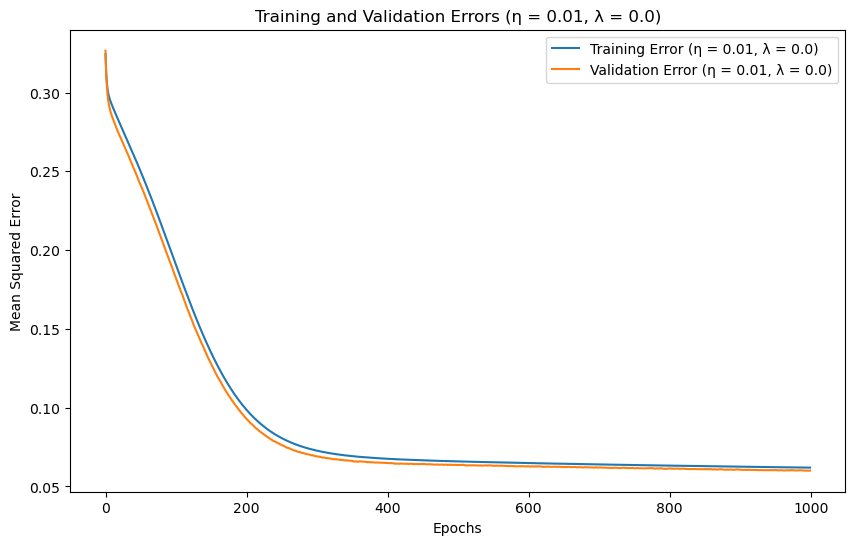

Training with η = 0.01, λ = 0.1
Epoch 0/1000 - Training Error: 0.34676, Validation Error: 0.32821
Epoch 100/1000 - Training Error: 0.31326, Validation Error: 0.29825
Epoch 200/1000 - Training Error: 0.33325, Validation Error: 0.31499
Epoch 300/1000 - Training Error: 0.33436, Validation Error: 0.31594
Epoch 400/1000 - Training Error: 0.33438, Validation Error: 0.31595
Epoch 500/1000 - Training Error: 0.33438, Validation Error: 0.31602
Epoch 600/1000 - Training Error: 0.33438, Validation Error: 0.31601
Epoch 700/1000 - Training Error: 0.33438, Validation Error: 0.31600
Epoch 800/1000 - Training Error: 0.33438, Validation Error: 0.31598
Epoch 900/1000 - Training Error: 0.33438, Validation Error: 0.31596


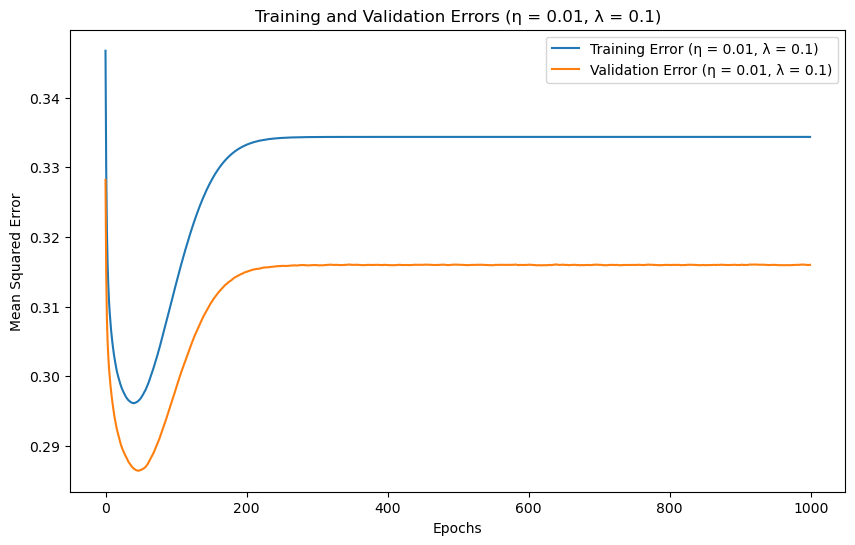

Training with η = 0.01, λ = 0.95
Epoch 0/1000 - Training Error: 0.34562, Validation Error: 0.32468
Epoch 100/1000 - Training Error: 0.33438, Validation Error: 0.31597
Epoch 200/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 300/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 400/1000 - Training Error: 0.33438, Validation Error: 0.31602
Epoch 500/1000 - Training Error: 0.33438, Validation Error: 0.31595
Epoch 600/1000 - Training Error: 0.33438, Validation Error: 0.31602
Epoch 700/1000 - Training Error: 0.33438, Validation Error: 0.31597
Epoch 800/1000 - Training Error: 0.33438, Validation Error: 0.31603
Epoch 900/1000 - Training Error: 0.33438, Validation Error: 0.31596


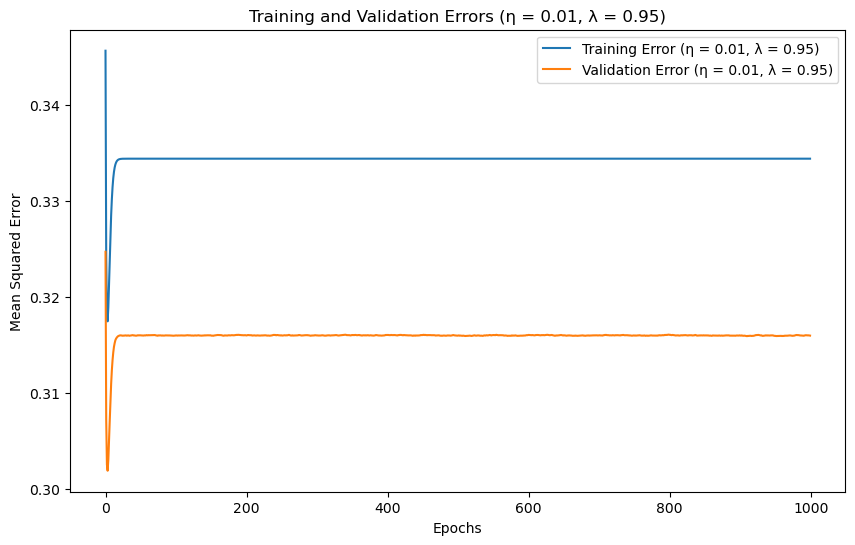

Training with η = 0.001, λ = 0.0
Epoch 0/1000 - Training Error: 0.30958, Validation Error: 0.31055
Epoch 100/1000 - Training Error: 0.30026, Validation Error: 0.29604
Epoch 200/1000 - Training Error: 0.29832, Validation Error: 0.29391
Epoch 300/1000 - Training Error: 0.29654, Validation Error: 0.29196
Epoch 400/1000 - Training Error: 0.29490, Validation Error: 0.29018
Epoch 500/1000 - Training Error: 0.29335, Validation Error: 0.28854
Epoch 600/1000 - Training Error: 0.29186, Validation Error: 0.28695
Epoch 700/1000 - Training Error: 0.29041, Validation Error: 0.28536
Epoch 800/1000 - Training Error: 0.28898, Validation Error: 0.28379
Epoch 900/1000 - Training Error: 0.28756, Validation Error: 0.28228


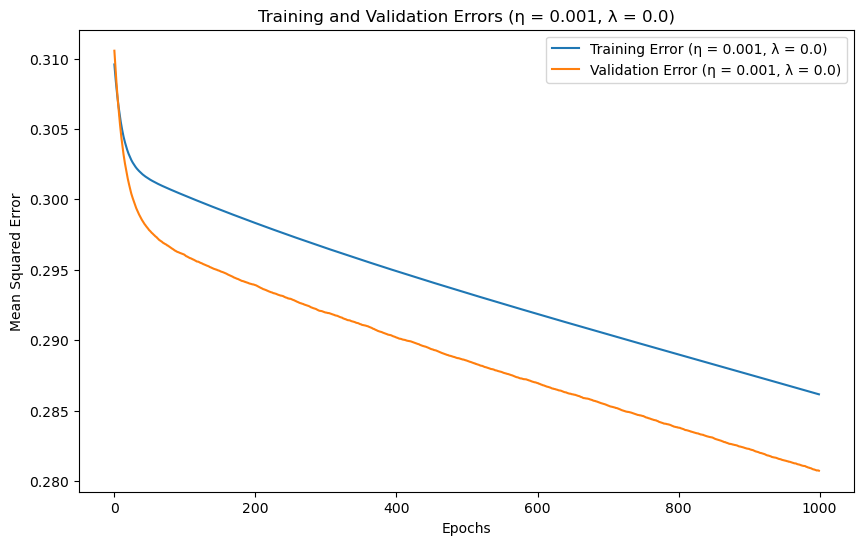

Training with η = 0.001, λ = 0.1
Epoch 0/1000 - Training Error: 0.37226, Validation Error: 0.35471
Epoch 100/1000 - Training Error: 0.30127, Validation Error: 0.29440
Epoch 200/1000 - Training Error: 0.29401, Validation Error: 0.28657
Epoch 300/1000 - Training Error: 0.29251, Validation Error: 0.28474
Epoch 400/1000 - Training Error: 0.29218, Validation Error: 0.28396
Epoch 500/1000 - Training Error: 0.29267, Validation Error: 0.28367
Epoch 600/1000 - Training Error: 0.29432, Validation Error: 0.28428
Epoch 700/1000 - Training Error: 0.29711, Validation Error: 0.28592
Epoch 800/1000 - Training Error: 0.30082, Validation Error: 0.28851
Epoch 900/1000 - Training Error: 0.30503, Validation Error: 0.29165


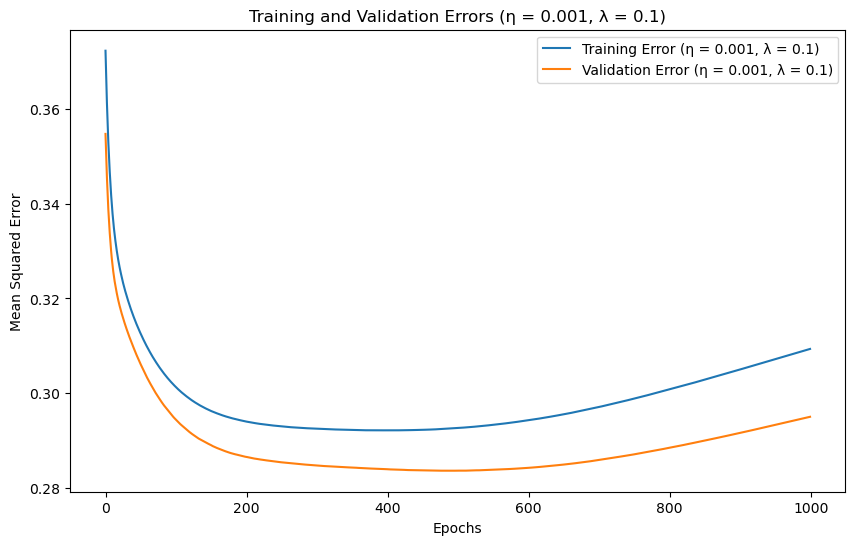

Training with η = 0.001, λ = 0.95
Epoch 0/1000 - Training Error: 0.23113, Validation Error: 0.22262
Epoch 100/1000 - Training Error: 0.32827, Validation Error: 0.31072
Epoch 200/1000 - Training Error: 0.33427, Validation Error: 0.31588
Epoch 300/1000 - Training Error: 0.33438, Validation Error: 0.31597
Epoch 400/1000 - Training Error: 0.33438, Validation Error: 0.31597
Epoch 500/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 600/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 700/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 800/1000 - Training Error: 0.33438, Validation Error: 0.31596
Epoch 900/1000 - Training Error: 0.33438, Validation Error: 0.31598


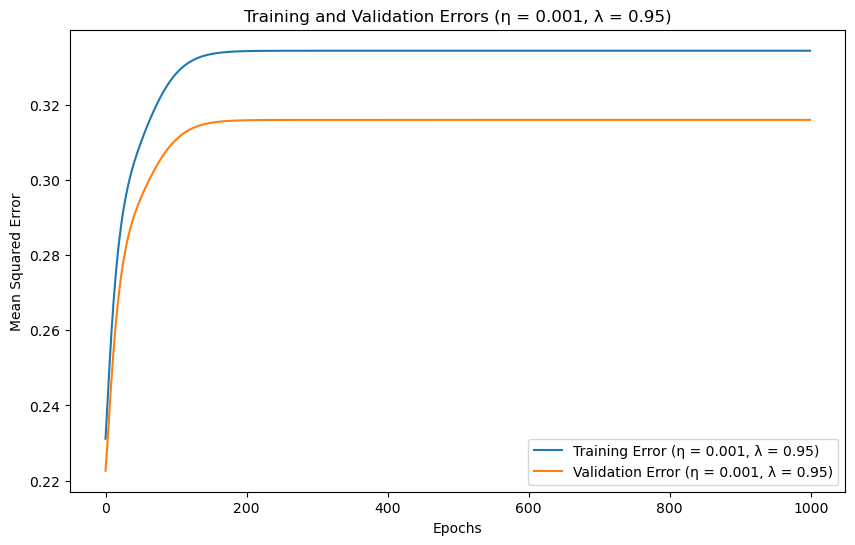

Training with η = 0.0001, λ = 0.0
Epoch 0/1000 - Training Error: 1.25864, Validation Error: 1.17895
Epoch 100/1000 - Training Error: 0.66996, Validation Error: 0.62850
Epoch 200/1000 - Training Error: 0.52789, Validation Error: 0.50494
Epoch 300/1000 - Training Error: 0.48893, Validation Error: 0.47466
Epoch 400/1000 - Training Error: 0.47358, Validation Error: 0.46317
Epoch 500/1000 - Training Error: 0.46355, Validation Error: 0.45473
Epoch 600/1000 - Training Error: 0.45488, Validation Error: 0.44668
Epoch 700/1000 - Training Error: 0.44678, Validation Error: 0.43869
Epoch 800/1000 - Training Error: 0.43904, Validation Error: 0.43091
Epoch 900/1000 - Training Error: 0.43160, Validation Error: 0.42335


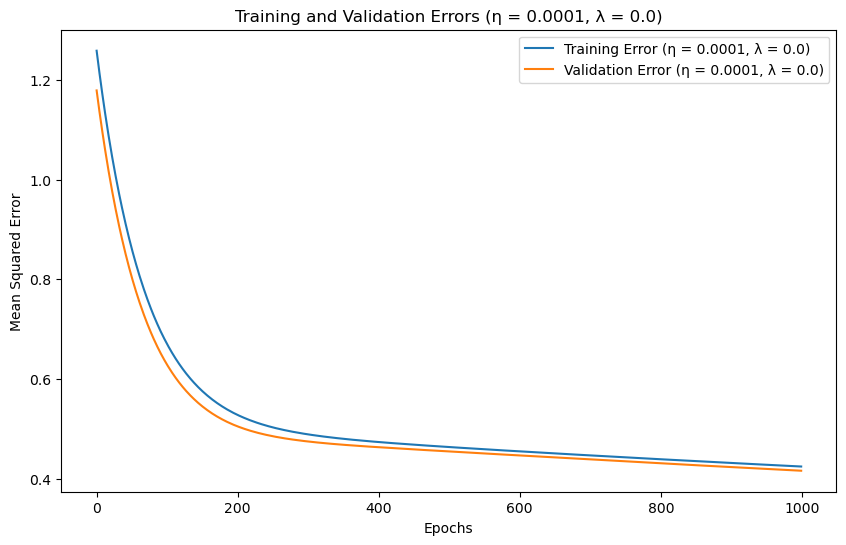

Training with η = 0.0001, λ = 0.1
Epoch 0/1000 - Training Error: 0.55807, Validation Error: 0.53105
Epoch 100/1000 - Training Error: 0.49136, Validation Error: 0.47252
Epoch 200/1000 - Training Error: 0.45684, Validation Error: 0.44290
Epoch 300/1000 - Training Error: 0.43571, Validation Error: 0.42474
Epoch 400/1000 - Training Error: 0.42057, Validation Error: 0.41140
Epoch 500/1000 - Training Error: 0.40845, Validation Error: 0.40043
Epoch 600/1000 - Training Error: 0.39815, Validation Error: 0.39083
Epoch 700/1000 - Training Error: 0.38909, Validation Error: 0.38220
Epoch 800/1000 - Training Error: 0.38099, Validation Error: 0.37437
Epoch 900/1000 - Training Error: 0.37369, Validation Error: 0.36721


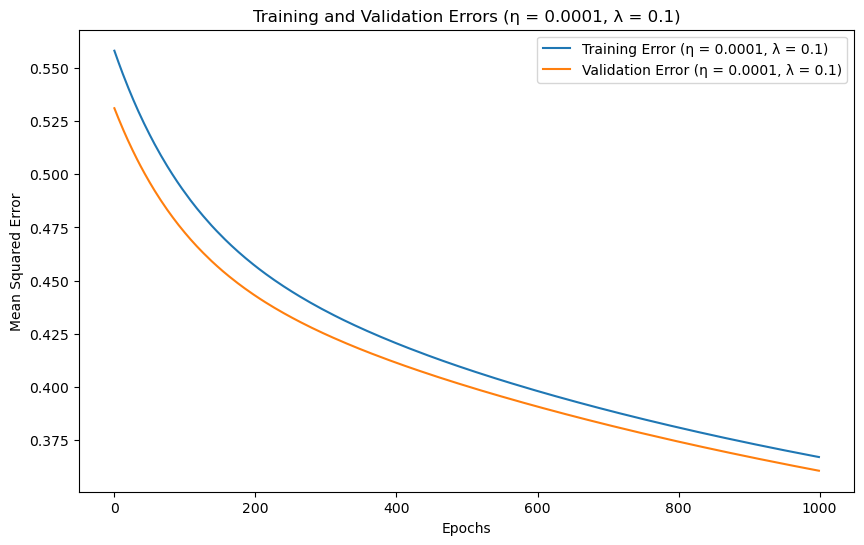

Training with η = 0.0001, λ = 0.95
Epoch 0/1000 - Training Error: 0.30949, Validation Error: 0.29638
Epoch 100/1000 - Training Error: 0.30379, Validation Error: 0.29123
Epoch 200/1000 - Training Error: 0.30350, Validation Error: 0.29056
Epoch 300/1000 - Training Error: 0.30613, Validation Error: 0.29246
Epoch 400/1000 - Training Error: 0.31005, Validation Error: 0.29557
Epoch 500/1000 - Training Error: 0.31432, Validation Error: 0.29905
Epoch 600/1000 - Training Error: 0.31843, Validation Error: 0.30246
Epoch 700/1000 - Training Error: 0.32211, Validation Error: 0.30554
Epoch 800/1000 - Training Error: 0.32521, Validation Error: 0.30815
Epoch 900/1000 - Training Error: 0.32771, Validation Error: 0.31027


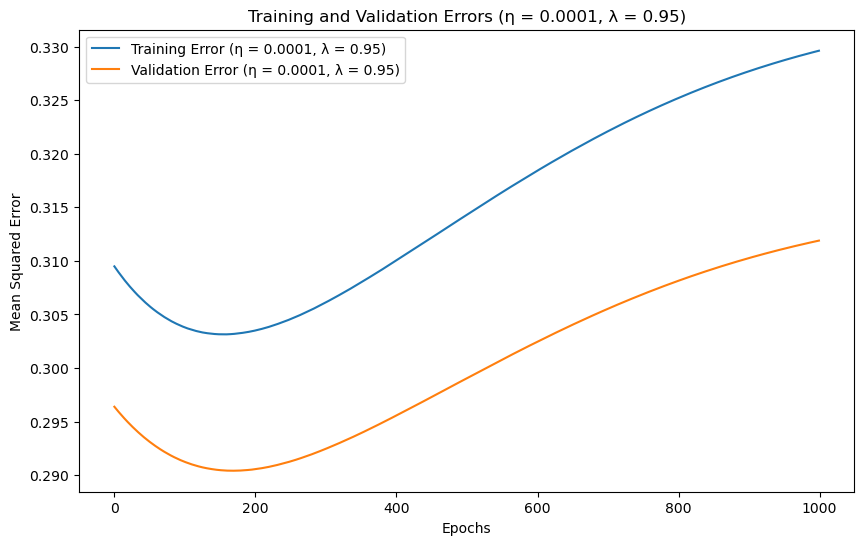

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def normalize_data(x):
    x_min = np.min(x) - 0.05 * (np.max(x) - np.min(x))
    x_max = np.max(x) + 0.05 * (np.max(x) - np.min(x))
    return 1.8 * (x - x_min) / (x_max - x_min) - 0.9

def initialize_weights(input_size, output_size):
    return np.random.randn(input_size, output_size) * np.sqrt(2.0 / input_size)

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    return x_train, y_train, x_val, y_val

class ANN:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.001, l2_lambda=0.0):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1  # First hidden layer
        self.hidden_size2 = hidden_size2  # Second hidden layer
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda

        self.weights_input_hidden1 = initialize_weights(self.input_size, self.hidden_size1)
        self.bias_hidden1 = np.zeros((1, self.hidden_size1))

        self.weights_hidden1_hidden2 = initialize_weights(self.hidden_size1, self.hidden_size2)
        self.bias_hidden2 = np.zeros((1, self.hidden_size2))

        self.weights_hidden2_output = initialize_weights(self.hidden_size2, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, x):
        # First hidden layer
        self.z1 = np.dot(x, self.weights_input_hidden1) + self.bias_hidden1
        self.a1 = tanh(self.z1)

        # Second hidden layer
        self.z2 = np.dot(self.a1, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.a2 = tanh(self.z2)

        # Output layer
        self.z3 = np.dot(self.a2, self.weights_hidden2_output) + self.bias_output
        self.a3 = self.z3  # Linear activation for the output layer

        return self.a3

    # Backpropagation with L2 regularization
    def backprop(self, x, y):
        m = x.shape[0]  

        # Output layer error
        output_error = self.a3 - y.reshape(-1, 1)

        # Second hidden layer error
        hidden2_error = np.dot(output_error, self.weights_hidden2_output.T) * tanh_derivative(self.z2)

        # First hidden layer error
        hidden1_error = np.dot(hidden2_error, self.weights_hidden1_hidden2.T) * tanh_derivative(self.z1)

        # Update weights and biases for output layer (with L2 regularization)
        self.weights_hidden2_output -= self.learning_rate * (np.dot(self.a2.T, output_error) / m + self.l2_lambda * self.weights_hidden2_output)
        self.bias_output -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True) / m

        # Update weights and biases for second hidden layer (with L2 regularization)
        self.weights_hidden1_hidden2 -= self.learning_rate * (np.dot(self.a1.T, hidden2_error) / m + self.l2_lambda * self.weights_hidden1_hidden2)
        self.bias_hidden2 -= self.learning_rate * np.sum(hidden2_error, axis=0, keepdims=True) / m

        # Update weights and biases for first hidden layer (with L2 regularization)
        self.weights_input_hidden1 -= self.learning_rate * (np.dot(x.T, hidden1_error) / m + self.l2_lambda * self.weights_input_hidden1)
        self.bias_hidden1 -= self.learning_rate * np.sum(hidden1_error, axis=0, keepdims=True) / m

    def train(self, x_train, y_train, x_val, y_val, epochs=5000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

def plot_errors(learning_rate, l2_lambda, train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label=f'Training Error (η = {learning_rate}, λ = {l2_lambda})')
    plt.plot(val_errors, label=f'Validation Error (η = {learning_rate}, λ = {l2_lambda})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Validation Errors (η = {learning_rate}, λ = {l2_lambda})')
    plt.legend()
    plt.show()

def main():
    x_train, y_train, x_val, y_val = generate_toy_data()

    x_train = normalize_data(x_train)
    y_train = normalize_data(y_train)
    x_val = normalize_data(x_val)
    y_val = normalize_data(y_val)

    input_size = 1
    hidden_size1 = 10  # First hidden layer
    hidden_size2 = 5   # Second hidden layer
    output_size = 1

    learning_rates = [0.01, 0.001, 0.0001]
    l2_lambdas = [0.0, 0.1, 0.95]

    for learning_rate in learning_rates:
        for l2_lambda in l2_lambdas:
            print(f"Training with η = {learning_rate}, λ = {l2_lambda}")
            ann = ANN(input_size, hidden_size1, hidden_size2, output_size, learning_rate, l2_lambda)
            train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=1000)
            plot_errors(learning_rate, l2_lambda, train_errors, val_errors)

if __name__ == "__main__":
    main()


In [7]:
#L2 REGULARIZATION


Training with L2 Regularization (lambda): 0
Epoch 0/1000 - Training Error: 1.17645, Validation Error: 1.08998
Epoch 100/1000 - Training Error: 0.31838, Validation Error: 0.31771
Epoch 200/1000 - Training Error: 0.20570, Validation Error: 0.20075
Epoch 300/1000 - Training Error: 0.15471, Validation Error: 0.14629
Epoch 400/1000 - Training Error: 0.13247, Validation Error: 0.12212
Epoch 500/1000 - Training Error: 0.12028, Validation Error: 0.10926
Epoch 600/1000 - Training Error: 0.11137, Validation Error: 0.10032
Epoch 700/1000 - Training Error: 0.10410, Validation Error: 0.09334
Epoch 800/1000 - Training Error: 0.09809, Validation Error: 0.08771
Epoch 900/1000 - Training Error: 0.09316, Validation Error: 0.08317


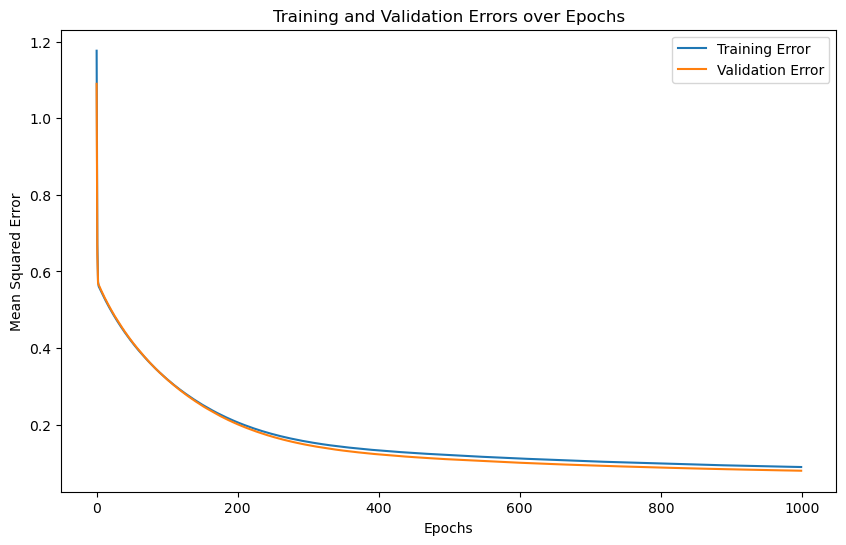

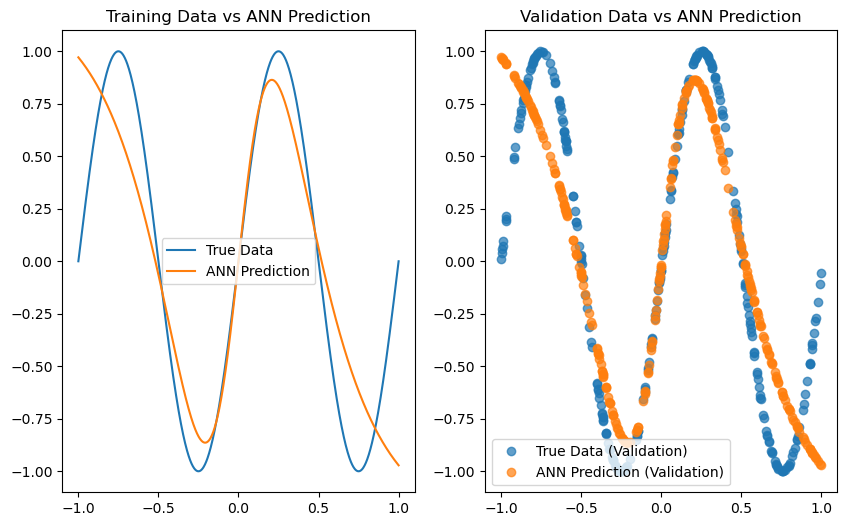


Training with L2 Regularization (lambda): 0.1
Epoch 0/1000 - Training Error: 0.38569, Validation Error: 0.38875
Epoch 100/1000 - Training Error: 0.29902, Validation Error: 0.29772
Epoch 200/1000 - Training Error: 0.23433, Validation Error: 0.22913
Epoch 300/1000 - Training Error: 0.19498, Validation Error: 0.18652
Epoch 400/1000 - Training Error: 0.17407, Validation Error: 0.16354
Epoch 500/1000 - Training Error: 0.16176, Validation Error: 0.15027
Epoch 600/1000 - Training Error: 0.15274, Validation Error: 0.14098
Epoch 700/1000 - Training Error: 0.14531, Validation Error: 0.13359
Epoch 800/1000 - Training Error: 0.13892, Validation Error: 0.12737
Epoch 900/1000 - Training Error: 0.13339, Validation Error: 0.12204


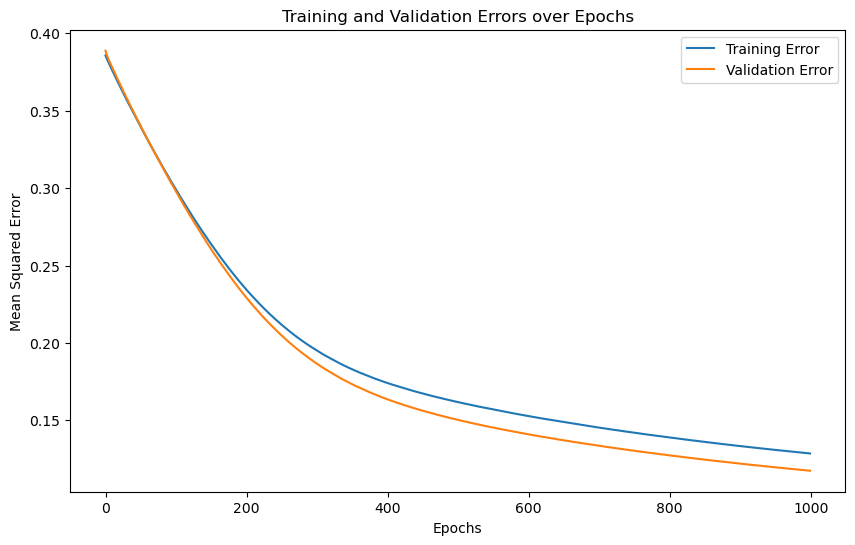

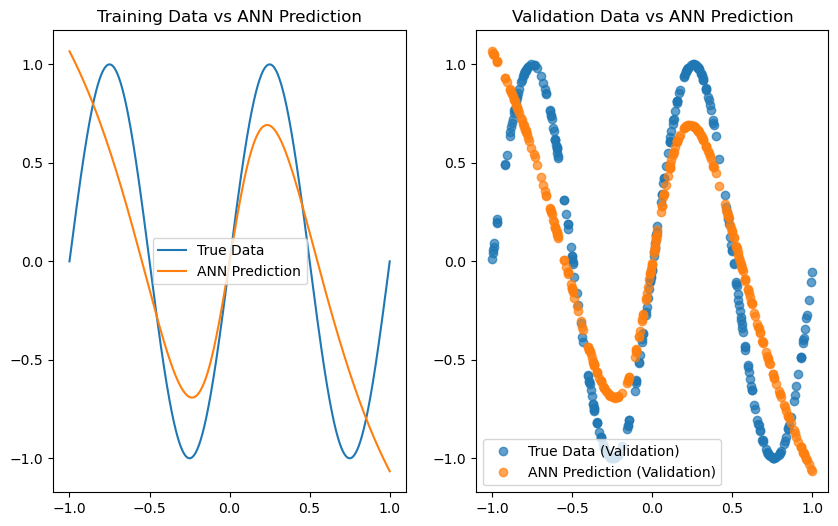


Training with L2 Regularization (lambda): 0.95
Epoch 0/1000 - Training Error: 1.47797, Validation Error: 1.36270
Epoch 100/1000 - Training Error: 0.42370, Validation Error: 0.42805
Epoch 200/1000 - Training Error: 0.41970, Validation Error: 0.42425
Epoch 300/1000 - Training Error: 0.42064, Validation Error: 0.42532
Epoch 400/1000 - Training Error: 0.42262, Validation Error: 0.42743
Epoch 500/1000 - Training Error: 0.42423, Validation Error: 0.42915
Epoch 600/1000 - Training Error: 0.42501, Validation Error: 0.42994
Epoch 700/1000 - Training Error: 0.42527, Validation Error: 0.43008
Epoch 800/1000 - Training Error: 0.42531, Validation Error: 0.43003
Epoch 900/1000 - Training Error: 0.42528, Validation Error: 0.42993


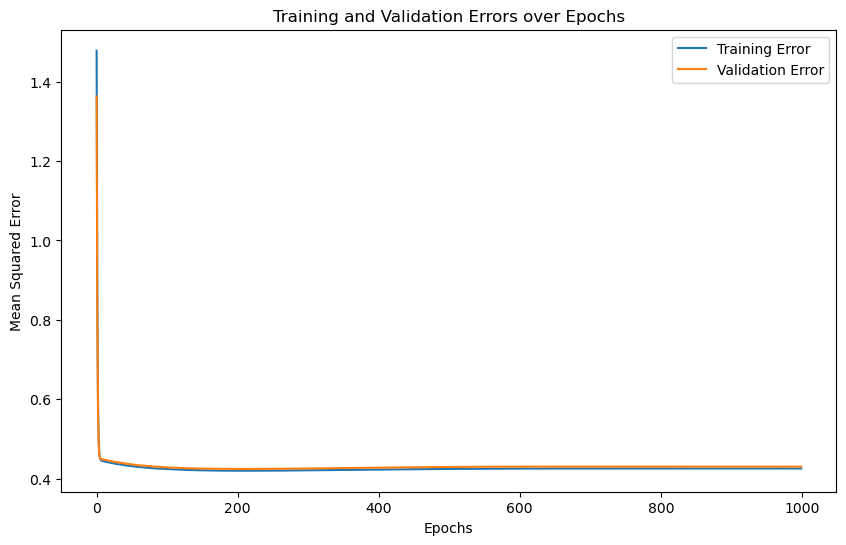

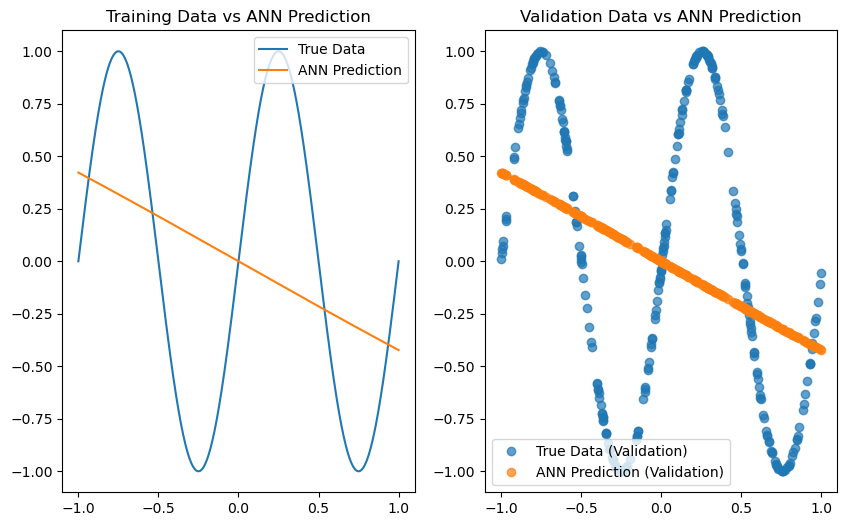

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    return x_train, y_train, x_val, y_val

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, l2_lambda=0.0, momentum_beta=0.9):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda  
        self.momentum_beta = momentum_beta  

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

        self.velocity_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.velocity_hidden_output = np.zeros_like(self.weights_hidden_output)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden  # Matrix multiplication for batch input
        self.a1 = tanh(self.z1)

        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2  # No activation in the final layer for regression
        return self.a2

    def backprop(self, x, y):
        m = x.shape[0]  
        output_error = self.a2 - y.reshape(-1, 1)  # Error term for all samples in the batch

        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        l2_regularization_hidden = self.l2_lambda * self.weights_hidden_output / m
        l2_regularization_input = self.l2_lambda * self.weights_input_hidden / m

        self.velocity_hidden_output = (
            self.momentum_beta * self.velocity_hidden_output
            - self.learning_rate * (np.dot(self.a1.T, output_error) / m + l2_regularization_hidden)
        )
        self.weights_hidden_output += self.velocity_hidden_output
        self.bias_output -= self.learning_rate * np.mean(output_error, axis=0, keepdims=True)

        self.velocity_input_hidden = (
            self.momentum_beta * self.velocity_input_hidden
            - self.learning_rate * (np.dot(x.T, hidden_error) / m + l2_regularization_input)
        )
        self.weights_input_hidden += self.velocity_input_hidden
        self.bias_hidden -= self.learning_rate * np.mean(hidden_error, axis=0, keepdims=True)

    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):
            
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            if batch_size == 'full':
                batch_size = len(x_train)  # Full batch training

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)  # Full pass through training set for error calculation
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)  # Full pass through validation set for error calculation
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

def plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train, label='True Data')
    plt.plot(x_train, predictions_train, label='ANN Prediction')
    plt.title("Training Data vs ANN Prediction")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_val, y_val, 'o', label='True Data (Validation)', alpha=0.7)
    plt.plot(x_val, predictions_val, 'o', label='ANN Prediction (Validation)', alpha=0.7)
    plt.title("Validation Data vs ANN Prediction")
    plt.legend()

    plt.show()

def main():
    x_train, y_train, x_val, y_val = generate_toy_data()

    x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) * 2 - 1
    x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val)) * 2 - 1

    input_size = 1
    hidden_size = 10  
    output_size = 1
    learning_rate = 0.001

    for l2_lambda in [0, 0.1, 0.95]:
        print(f"\nTraining with L2 Regularization (lambda): {l2_lambda}")
        ann = ANN(input_size, hidden_size, output_size, learning_rate, l2_lambda)

        train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=1000)

        plot_errors(train_errors, val_errors)

        predictions_train = ann.forward(x_train.reshape(-1, 1))
        predictions_val = ann.forward(x_val.reshape(-1, 1))

        plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val)

if __name__ == "__main__":
    main()


In [9]:
#MAPE CALCULATION


Training with L2 Regularization (lambda): 0
Epoch 0/1000 - Training Error: 0.43883, Validation Error: 0.42073
Epoch 100/1000 - Training Error: 0.34478, Validation Error: 0.32710
Epoch 200/1000 - Training Error: 0.26568, Validation Error: 0.25485
Epoch 300/1000 - Training Error: 0.21045, Validation Error: 0.20828
Epoch 400/1000 - Training Error: 0.18062, Validation Error: 0.18496
Epoch 500/1000 - Training Error: 0.16361, Validation Error: 0.17175
Epoch 600/1000 - Training Error: 0.15079, Validation Error: 0.15994
Epoch 700/1000 - Training Error: 0.13954, Validation Error: 0.14914
Epoch 800/1000 - Training Error: 0.12947, Validation Error: 0.13859
Epoch 900/1000 - Training Error: 0.12061, Validation Error: 0.12899


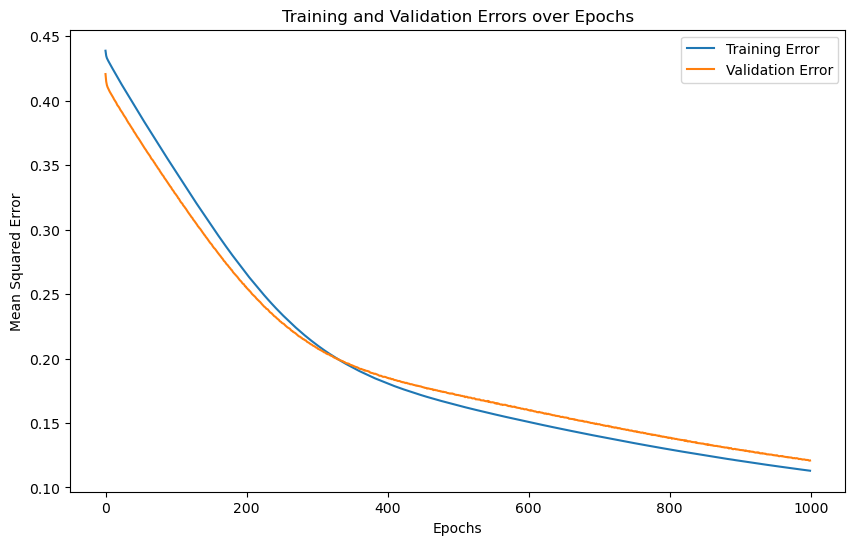

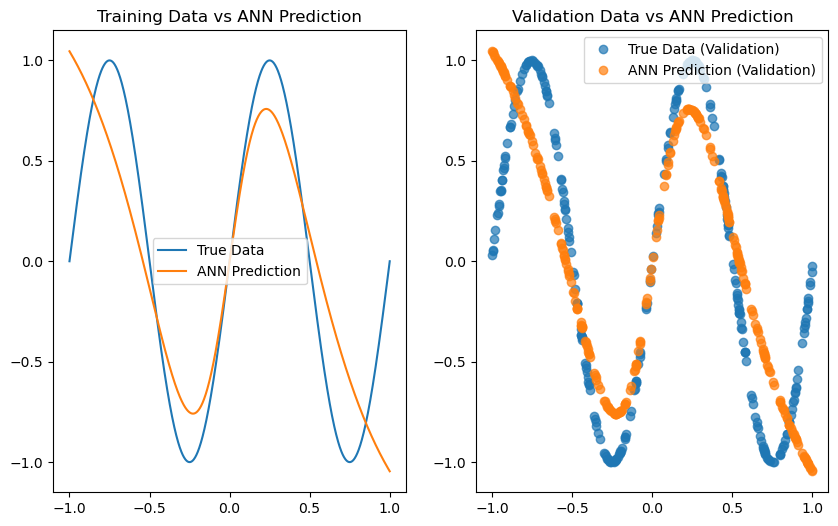

Validation MAPE: 2.07%
Test MAPE: 2.83%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle  

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    x_test = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_test = np.sin(x_test)

    return x_train, y_train, x_val, y_val, x_test, y_test

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, l2_lambda=0.0, momentum_beta=0.9):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda  
        self.momentum_beta = momentum_beta  

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

        self.velocity_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.velocity_hidden_output = np.zeros_like(self.weights_hidden_output)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden  # Matrix multiplication for batch input
        self.a1 = tanh(self.z1)

        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2  # No activation in the final layer for regression
        return self.a2

    def backprop(self, x, y):
        m = x.shape[0]  

        output_error = self.a2 - y.reshape(-1, 1)  # Error term for all samples in the batch

        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        l2_regularization_hidden = self.l2_lambda * self.weights_hidden_output / m
        l2_regularization_input = self.l2_lambda * self.weights_input_hidden / m

        self.velocity_hidden_output = (
            self.momentum_beta * self.velocity_hidden_output
            - self.learning_rate * (np.dot(self.a1.T, output_error) / m + l2_regularization_hidden)
        )
        self.weights_hidden_output += self.velocity_hidden_output
        self.bias_output -= self.learning_rate * np.mean(output_error, axis=0, keepdims=True)

        self.velocity_input_hidden = (
            self.momentum_beta * self.velocity_input_hidden
            - self.learning_rate * (np.dot(x.T, hidden_error) / m + l2_regularization_input)
        )
        self.weights_input_hidden += self.velocity_input_hidden
        self.bias_hidden -= self.learning_rate * np.mean(hidden_error, axis=0, keepdims=True)

    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64, patience=10):
        train_errors = []
        val_errors = []
        best_val_error = float('inf')
        best_weights = None
        patience_counter = 0

        for epoch in range(epochs):

            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            if batch_size == 'full':
                batch_size = len(x_train)  # Full batch training

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)  
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)  
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if val_error < best_val_error:
                best_val_error = val_error
                best_weights = self.get_weights()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter > patience:
                print(f"Early stopping at epoch {epoch}. Best validation error: {best_val_error:.5f}")
                break

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        self.save_weights(best_weights)
        return train_errors, val_errors

    def save_weights(self, weights):
        with open('best_weights.pkl', 'wb') as f:
            pickle.dump(weights, f)

    def load_weights(self, filepath='best_weights.pkl'):
        with open(filepath, 'rb') as f:
            weights = pickle.load(f)
        self.set_weights(weights)

    def get_weights(self):
        return {
            'weights_input_hidden': self.weights_input_hidden,
            'bias_hidden': self.bias_hidden,
            'weights_hidden_output': self.weights_hidden_output,
            'bias_output': self.bias_output
        }

    def set_weights(self, weights):
        self.weights_input_hidden = weights['weights_input_hidden']
        self.bias_hidden = weights['bias_hidden']
        self.weights_hidden_output = weights['weights_hidden_output']
        self.bias_output = weights['bias_output']

    def calculate_mape(self, y_true, y_pred, epsilon=0.001):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon)))

def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

def plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train, label='True Data')
    plt.plot(x_train, predictions_train, label='ANN Prediction')
    plt.title("Training Data vs ANN Prediction")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_val, y_val, 'o', label='True Data (Validation)', alpha=0.7)
    plt.plot(x_val, predictions_val, 'o', label='ANN Prediction (Validation)', alpha=0.7)
    plt.title("Validation Data vs ANN Prediction")
    plt.legend()

    plt.show()

def main():
    x_train, y_train, x_val, y_val, x_test, y_test = generate_toy_data()

    x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) * 2 - 1
    x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val)) * 2 - 1
    x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)) * 2 - 1

    input_size = 1
    hidden_size = 10  
    output_size = 1
    learning_rate = 0.001

    for l2_lambda in [0]:
        print(f"\nTraining with L2 Regularization (lambda): {l2_lambda}")
        ann = ANN(input_size, hidden_size, output_size, learning_rate, l2_lambda)

        train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=1000)

        plot_errors(train_errors, val_errors)

        ann.load_weights()  
        predictions_train = ann.forward(x_train.reshape(-1, 1))
        predictions_val = ann.forward(x_val.reshape(-1, 1))
        predictions_test = ann.forward(x_test.reshape(-1, 1))

        plot_results(x_train, y_train, x_val, y_val, predictions_train, predictions_val)

        mape_val = ann.calculate_mape(y_val, predictions_val)
        mape_test = ann.calculate_mape(y_test, predictions_test)
        print(f"Validation MAPE: {mape_val:.2f}%")
        print(f"Test MAPE: {mape_test:.2f}%")

if __name__ == "__main__":
    main()

In [11]:
#ADAM

Epoch 0/5000 - Training Error: 0.53343, Validation Error: 0.55869
Epoch 100/5000 - Training Error: 0.19022, Validation Error: 0.20373
Epoch 200/5000 - Training Error: 0.11526, Validation Error: 0.12130
Epoch 300/5000 - Training Error: 0.08442, Validation Error: 0.08824
Epoch 400/5000 - Training Error: 0.07517, Validation Error: 0.07786
Epoch 500/5000 - Training Error: 0.07123, Validation Error: 0.07388
Epoch 600/5000 - Training Error: 0.06845, Validation Error: 0.07089
Epoch 700/5000 - Training Error: 0.06598, Validation Error: 0.06853
Epoch 800/5000 - Training Error: 0.06320, Validation Error: 0.06605
Epoch 900/5000 - Training Error: 0.05723, Validation Error: 0.05999
Epoch 1000/5000 - Training Error: 0.04847, Validation Error: 0.05068
Epoch 1100/5000 - Training Error: 0.04156, Validation Error: 0.04322
Epoch 1200/5000 - Training Error: 0.03554, Validation Error: 0.03669
Epoch 1300/5000 - Training Error: 0.02931, Validation Error: 0.03001
Epoch 1400/5000 - Training Error: 0.02347, Val

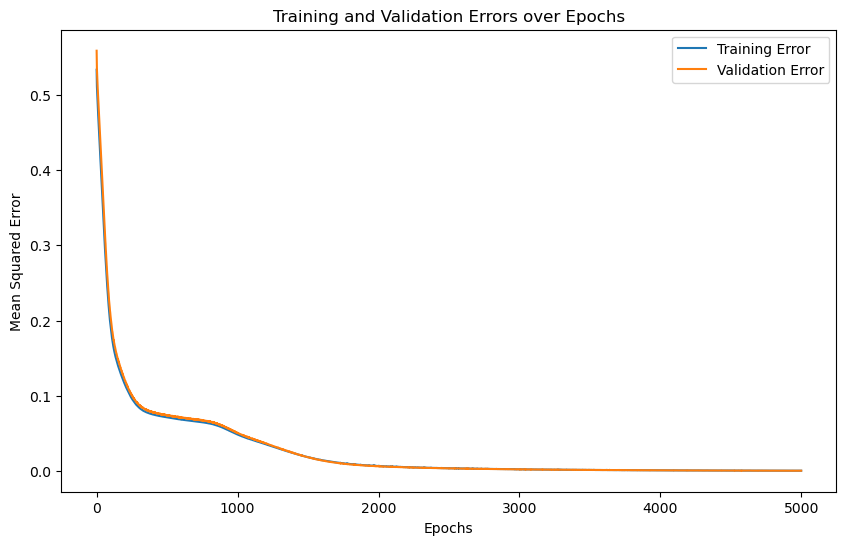

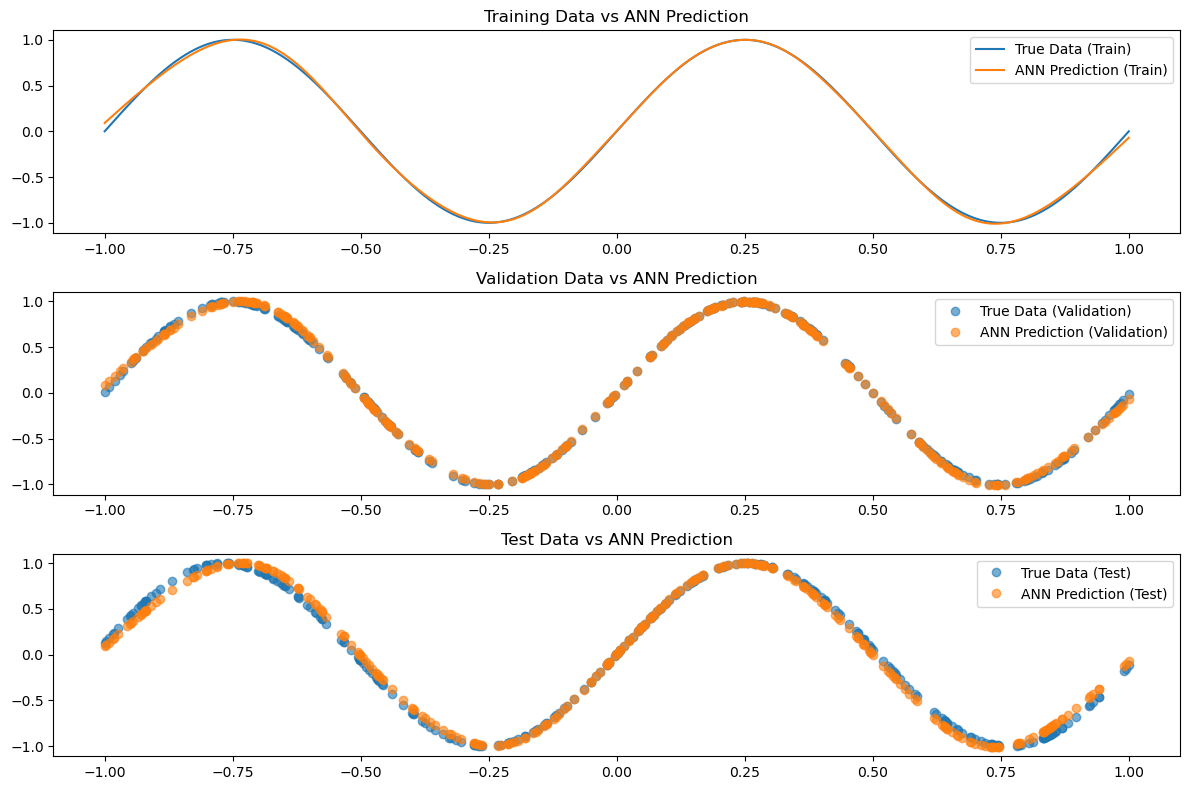

Validation MAPE: 2.83%
Test MAPE: 2.80%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def generate_toy_data():
    x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
    y_train = np.sin(x_train)

    x_val = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_val = np.sin(x_val)

    x_test = np.random.uniform(-2*np.pi, 2*np.pi, 300)
    y_test = np.sin(x_test)

    return x_train, y_train, x_val, y_val, x_test, y_test

class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

        self.m_wih = np.zeros_like(self.weights_input_hidden)  # 1st moment for input -> hidden weights
        self.v_wih = np.zeros_like(self.weights_input_hidden)  # 2nd moment for input -> hidden weights
        self.m_who = np.zeros_like(self.weights_hidden_output)  # 1st moment for hidden -> output weights
        self.v_who = np.zeros_like(self.weights_hidden_output)  # 2nd moment for hidden -> output weights

        self.m_bh = np.zeros_like(self.bias_hidden)  # 1st moment for hidden bias
        self.v_bh = np.zeros_like(self.bias_hidden)  # 2nd moment for hidden bias
        self.m_bo = np.zeros_like(self.bias_output)  # 1st moment for output bias
        self.v_bo = np.zeros_like(self.bias_output)  # 2nd moment for output bias

        self.timestep = 0

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden  # Matrix multiplication for batch input
        self.a1 = tanh(self.z1)

        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2  # No activation in the final layer for regression
        return self.a2

    def backprop(self, x, y):
        m = x.shape[0]  

        output_error = self.a2 - y.reshape(-1, 1)  # Error term for all samples in the batch

        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        self.timestep += 1

        self.m_wih = self.beta1 * self.m_wih + (1 - self.beta1) * np.dot(x.T, hidden_error) / m
        self.v_wih = self.beta2 * self.v_wih + (1 - self.beta2) * (np.dot(x.T, hidden_error) / m) ** 2
        m_wih_corrected = self.m_wih / (1 - self.beta1 ** self.timestep)
        v_wih_corrected = self.v_wih / (1 - self.beta2 ** self.timestep)

        self.m_who = self.beta1 * self.m_who + (1 - self.beta1) * np.dot(self.a1.T, output_error) / m
        self.v_who = self.beta2 * self.v_who + (1 - self.beta2) * (np.dot(self.a1.T, output_error) / m) ** 2
        m_who_corrected = self.m_who / (1 - self.beta1 ** self.timestep)
        v_who_corrected = self.v_who / (1 - self.beta2 ** self.timestep)

        self.m_bh = self.beta1 * self.m_bh + (1 - self.beta1) * np.mean(hidden_error, axis=0, keepdims=True)
        self.v_bh = self.beta2 * self.v_bh + (1 - self.beta2) * (np.mean(hidden_error, axis=0, keepdims=True)) ** 2
        m_bh_corrected = self.m_bh / (1 - self.beta1 ** self.timestep)
        v_bh_corrected = self.v_bh / (1 - self.beta2 ** self.timestep)

        self.m_bo = self.beta1 * self.m_bo + (1 - self.beta1) * np.mean(output_error, axis=0, keepdims=True)
        self.v_bo = self.beta2 * self.v_bo + (1 - self.beta2) * (np.mean(output_error, axis=0, keepdims=True)) ** 2
        m_bo_corrected = self.m_bo / (1 - self.beta1 ** self.timestep)
        v_bo_corrected = self.v_bo / (1 - self.beta2 ** self.timestep)

        self.weights_input_hidden -= self.learning_rate * m_wih_corrected / (np.sqrt(v_wih_corrected) + self.epsilon)
        self.weights_hidden_output -= self.learning_rate * m_who_corrected / (np.sqrt(v_who_corrected) + self.epsilon)

        self.bias_hidden -= self.learning_rate * m_bh_corrected / (np.sqrt(v_bh_corrected) + self.epsilon)
        self.bias_output -= self.learning_rate * m_bo_corrected / (np.sqrt(v_bo_corrected) + self.epsilon)

    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            train_output = self.forward(x_train)  # Full pass through training set for error calculation
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            val_output = self.forward(x_val)  # Full pass through validation set for error calculation
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

    def calculate_mape(self, y_true, y_pred, epsilon=0.001):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon)))

def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

def plot_predictions(x_train, y_train, x_val, y_val, x_test, y_test, predictions_train, predictions_val, predictions_test):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(x_train, y_train, label='True Data (Train)')
    plt.plot(x_train, predictions_train, label='ANN Prediction (Train)')
    plt.title("Training Data vs ANN Prediction")
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(x_val, y_val, 'o', label='True Data (Validation)', alpha=0.6)
    plt.plot(x_val, predictions_val, 'o', label='ANN Prediction (Validation)', alpha=0.6)
    plt.title("Validation Data vs ANN Prediction")
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(x_test, y_test, 'o', label='True Data (Test)', alpha=0.6)
    plt.plot(x_test, predictions_test, 'o', label='ANN Prediction (Test)', alpha=0.6)
    plt.title("Test Data vs ANN Prediction")
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    x_train, y_train, x_val, y_val, x_test, y_test = generate_toy_data()

    x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) * 2 - 1
    x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val)) * 2 - 1
    x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)) * 2 - 1

    input_size = 1
    hidden_size = 10  # Experiment with different values
    output_size = 1
    learning_rate = 0.001

    ann = ANN(input_size, hidden_size, output_size, learning_rate)

    train_errors, val_errors = ann.train(x_train.reshape(-1, 1), y_train, x_val.reshape(-1, 1), y_val, epochs=5000)

    predictions_train = ann.forward(x_train.reshape(-1, 1))
    predictions_val = ann.forward(x_val.reshape(-1, 1))
    predictions_test = ann.forward(x_test.reshape(-1, 1))

    plot_errors(train_errors, val_errors)

    plot_predictions(x_train, y_train, x_val, y_val, x_test, y_test, predictions_train, predictions_val, predictions_test)

    mape_val = ann.calculate_mape(y_val, predictions_val)
    mape_test = ann.calculate_mape(y_test, predictions_test)

    print(f"Validation MAPE: {mape_val:.2f}%")
    print(f"Test MAPE: {mape_test:.2f}%")

if __name__ == "__main__":
    main()

In [13]:
#CCPP

Epoch 0/1000 - Training Error: 323263340.45665, Validation Error: 323254132.76133
Epoch 10/1000 - Training Error: 39544368.85315, Validation Error: 39541153.21911
Epoch 20/1000 - Training Error: 4837634.73616, Validation Error: 4836514.84936
Epoch 30/1000 - Training Error: 592037.99300, Validation Error: 591651.10053
Epoch 40/1000 - Training Error: 72676.18693, Validation Error: 72545.66540
Epoch 50/1000 - Training Error: 9145.22354, Validation Error: 9104.36738
Epoch 60/1000 - Training Error: 1373.68786, Validation Error: 1364.19197
Epoch 70/1000 - Training Error: 422.93704, Validation Error: 424.41017
Epoch 80/1000 - Training Error: 306.63865, Validation Error: 311.94807
Epoch 90/1000 - Training Error: 292.39369, Validation Error: 299.04807
Epoch 100/1000 - Training Error: 290.66794, Validation Error: 297.78975
Epoch 110/1000 - Training Error: 290.45861, Validation Error: 297.74154
Epoch 120/1000 - Training Error: 290.43158, Validation Error: 297.77272
Epoch 130/1000 - Training Error

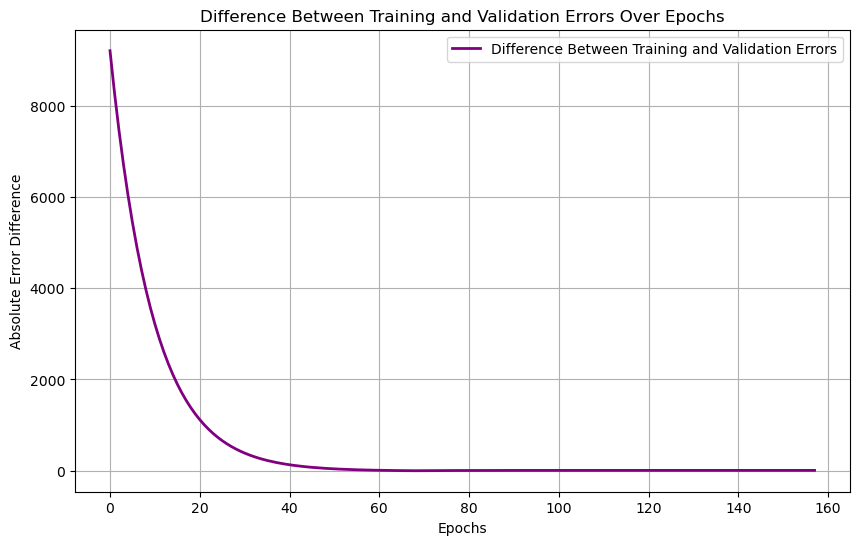

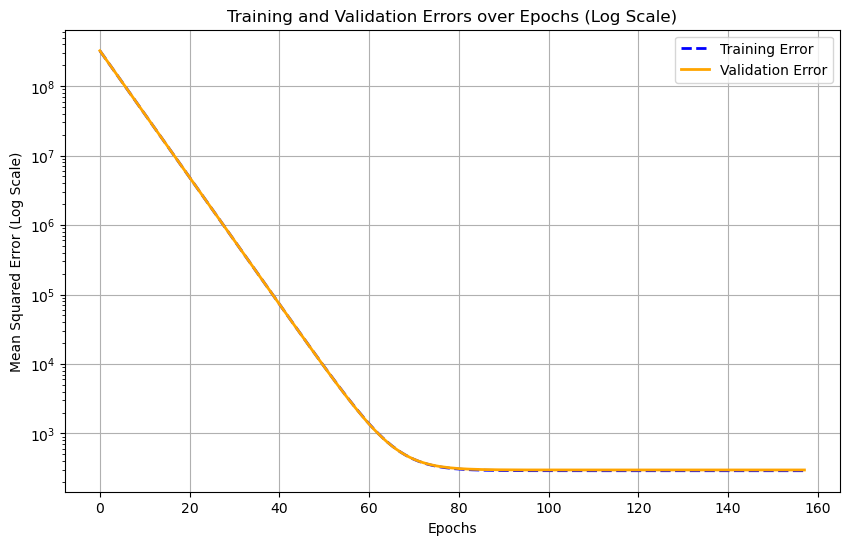

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle  

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

class ANN:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.001, l2_lambda=0.0, momentum_beta=0.9, activation='relu'):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda  # L2 regularization term
        self.momentum_beta = momentum_beta  # Momentum coefficient
        self.activation = activation

        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden_size1) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden1 = np.zeros((1, self.hidden_size1))

        self.weights_hidden1_hidden2 = np.random.randn(self.hidden_size1, self.hidden_size2) * np.sqrt(2.0 / self.hidden_size1)
        self.bias_hidden2 = np.zeros((1, self.hidden_size2))

        self.weights_hidden_output = np.random.randn(self.hidden_size2, self.output_size) * np.sqrt(2.0 / self.hidden_size2)
        self.bias_output = np.zeros((1, self.output_size))

        self.velocity_input_hidden1 = np.zeros_like(self.weights_input_hidden1)
        self.velocity_hidden1_hidden2 = np.zeros_like(self.weights_hidden1_hidden2)
        self.velocity_hidden_output = np.zeros_like(self.weights_hidden_output)

    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden1) + self.bias_hidden1
        if self.activation == 'relu':
            self.a1 = relu(self.z1)
        else:
            self.a1 = tanh(self.z1)

        self.z2 = np.dot(self.a1, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.a2 = relu(self.z2)  # or tanh based on your choice

        self.z3 = np.dot(self.a2, self.weights_hidden_output) + self.bias_output
        self.a3 = self.z3  # No activation in the final layer for regression
        return self.a3

    def backprop(self, x, y):
        m = x.shape[0]  

        output_error = self.a3 - y.reshape(-1, 1)  # Error term for all samples in the batch

        hidden2_error = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative(self.z2)

        hidden1_error = np.dot(hidden2_error, self.weights_hidden1_hidden2.T) * relu_derivative(self.z1)

        l2_regularization_hidden2 = self.l2_lambda * self.weights_hidden_output / m
        l2_regularization_hidden1 = self.l2_lambda * self.weights_hidden1_hidden2 / m
        l2_regularization_input = self.l2_lambda * self.weights_input_hidden1 / m

        self.velocity_hidden_output = (
            self.momentum_beta * self.velocity_hidden_output
            - self.learning_rate * (np.dot(self.a2.T, output_error) / m + l2_regularization_hidden2)
        )
        self.weights_hidden_output += self.velocity_hidden_output
        self.bias_output -= self.learning_rate * np.mean(output_error, axis=0, keepdims=True)

        self.velocity_hidden1_hidden2 = (
            self.momentum_beta * self.velocity_hidden1_hidden2
            - self.learning_rate * (np.dot(self.a1.T, hidden2_error) / m + l2_regularization_hidden1)
        )
        self.weights_hidden1_hidden2 += self.velocity_hidden1_hidden2
        self.bias_hidden2 -= self.learning_rate * np.mean(hidden2_error, axis=0, keepdims=True)

        self.velocity_input_hidden1 = (
            self.momentum_beta * self.velocity_input_hidden1
            - self.learning_rate * (np.dot(x.T, hidden1_error) / m + l2_regularization_input)
        )
        self.weights_input_hidden1 += self.velocity_input_hidden1
        self.bias_hidden1 -= self.learning_rate * np.mean(hidden1_error, axis=0, keepdims=True)

    def get_weights(self):
        return {
            'weights_input_hidden1': self.weights_input_hidden1,
            'bias_hidden1': self.bias_hidden1,
            'weights_hidden1_hidden2': self.weights_hidden1_hidden2,
            'bias_hidden2': self.bias_hidden2,
            'weights_hidden_output': self.weights_hidden_output,
            'bias_output': self.bias_output
        }

    def set_weights(self, weights):
        self.weights_input_hidden1 = weights['weights_input_hidden1']
        self.bias_hidden1 = weights['bias_hidden1']
        self.weights_hidden1_hidden2 = weights['weights_hidden1_hidden2']
        self.bias_hidden2 = weights['bias_hidden2']
        self.weights_hidden_output = weights['weights_hidden_output']
        self.bias_output = weights['bias_output']

    def save_weights(self, weights):
        with open('best_weights.pkl', 'wb') as f:
            pickle.dump(weights, f)

    def load_weights(self, filepath='best_weights.pkl'):
        with open(filepath, 'rb') as f:
            weights = pickle.load(f)
        self.set_weighs(weights)

    def calculate_mape(self, y_true, y_pred, epsilon=0.001):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon)))

    # Training method with early stopping and validation
    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64, patience=50):
        train_errors = []
        val_errors = []
        best_val_error = float('inf')
        best_weights = None
        patience_counter = 0

        for epoch in range(epochs):
            # Shuffle data
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            # Mini-batch training
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                # Forward and backward passes (using vectorized operations on the batch)
                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            # Calculate training error (MSE)
            train_output = self.forward(x_train)  # Full pass through training set for error calculation
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            # Calculate validation error (MSE)
            val_output = self.forward(x_val)  # Full pass through validation set for error calculation
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            # Early stopping: Check if the validation error improves
            if val_error < best_val_error:
                best_val_error = val_error
                best_weights = self.get_weights()
                patience_counter = 0
            else:
                patience_counter += 1

            # Stop training if no improvement after 'patience' epochs
            if patience_counter > patience:
                print(f"Early stopping at epoch {epoch}. Best validation error: {best_val_error:.5f}")
                break

            # Print errors at each epoch
            if epoch % 10 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        # Save the best weights and return the errors
        self.save_weights(best_weights)
        return train_errors, val_errors

# Plot the difference between training and validation errors
def plot_error_difference(train_errors, val_errors):
    error_difference = np.abs(np.array(train_errors) - np.array(val_errors))

    plt.figure(figsize=(10, 6))

    plt.plot(error_difference, label='Difference Between Training and Validation Errors', color='purple', linewidth=2)

    plt.xlabel('Epochs')
    plt.ylabel('Absolute Error Difference')
    plt.title('Difference Between Training and Validation Errors Over Epochs')

    plt.grid(True)
    plt.legend()
    plt.show()

# Plot training and validation errors on a logarithmic scale
def plot_errors_log(train_errors, val_errors):
    plt.figure(figsize=(10, 6))

    # Plot training error with logarithmic scale
    plt.plot(train_errors, label='Training Error', linestyle='--', linewidth=2, color='blue')

    # Plot validation error
    plt.plot(val_errors, label='Validation Error', linestyle='-', linewidth=2, color='orange')

    plt.yscale('log')  # Set y-axis to logarithmic scale

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Log Scale)')
    plt.title('Training and Validation Errors over Epochs (Log Scale)')

    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution function
def main():
    # Load Combined Cycle Power Plant dataset from Google Drive
    data = pd.read_excel('Folds5x2_pp.xlsx')

    # Extract input features and output
    X = data[['AT', 'V', 'AP', 'RH']].values  # 4 input variables
    y = data['PE'].values  # 1 output variable

    # Split the data into training (70%), validation (15%), and test sets (15%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Define network architecture
    input_size = X_train.shape[1]  # Number of features (4)
    hidden_size1 = 45  # First hidden layer size
    hidden_size2 = 45  # Second hidden layer size
    output_size = 1  # Single output (PE - Power Output)
    learning_rate = 0.001  # Reduced learning rate for smoother convergence
    l2_lambda = 0.01  # Added L2 regularization to avoid overfitting

    # Instantiate the ANN
    ann = ANN(input_size, hidden_size1, hidden_size2, output_size, learning_rate, l2_lambda=l2_lambda, activation='relu')

    # Train the network and capture the error history
    train_errors, val_errors = ann.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=64, patience=50)

    # Option 1: Plot the difference between training and validation errors
    plot_error_difference(train_errors, val_errors)

    # Option 2: Plot training and validation errors on a logarithmic scale
    plot_errors_log(train_errors, val_errors)

if __name__ == "__main__":
    main()

Epoch 0/1000 - Training Error: 290.44608, Validation Error: 297.74964
Epoch 10/1000 - Training Error: 290.45318, Validation Error: 297.74440
Epoch 20/1000 - Training Error: 290.86101, Validation Error: 298.57141
Epoch 30/1000 - Training Error: 291.79610, Validation Error: 298.56956
Epoch 40/1000 - Training Error: 293.96832, Validation Error: 302.30574
Epoch 50/1000 - Training Error: 291.03539, Validation Error: 298.80795
Epoch 60/1000 - Training Error: 291.12754, Validation Error: 298.07179
Early stopping at epoch 69. Best validation error: 297.73595


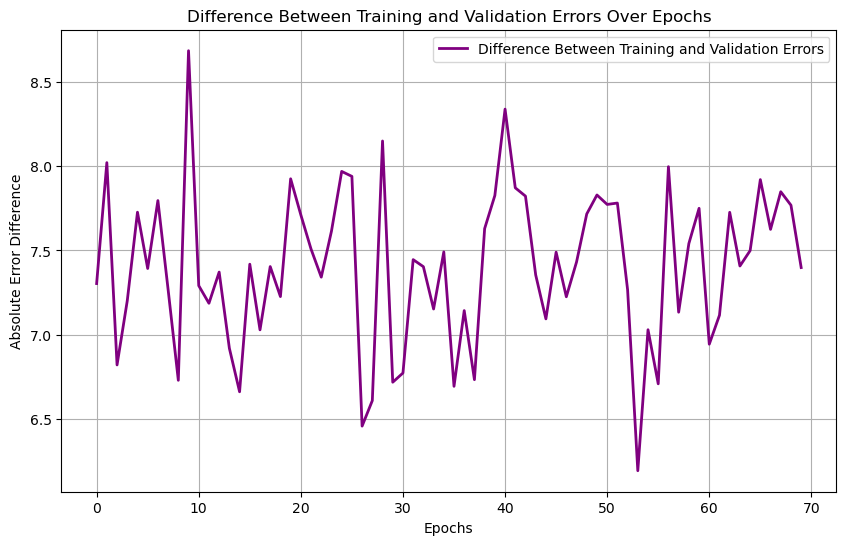

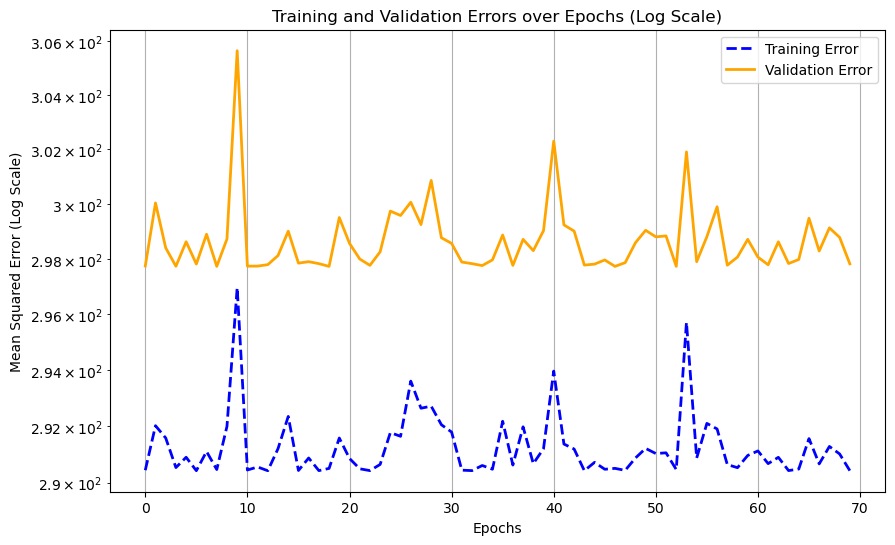

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
# Mount Google Drive
#drive.mount('/content/drive')

# Activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define ANN structure and initialize weights manually (no deep learning libraries)
class ANN:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.001, l2_lambda=0.0, momentum_beta=0.9, activation='tanh'):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda  # L2 regularization term
        self.momentum_beta = momentum_beta  # Momentum coefficient
        self.activation = activation

        # Initialize weights and biases for input -> hidden layer 1
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden_size1) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden1 = np.zeros((1, self.hidden_size1))

        # Initialize weights and biases for hidden layer 1 -> hidden layer 2
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden_size1, self.hidden_size2) * np.sqrt(2.0 / self.hidden_size1)
        self.bias_hidden2 = np.zeros((1, self.hidden_size2))

        # Initialize weights and biases for hidden -> output layer
        self.weights_hidden_output = np.random.randn(self.hidden_size2, self.output_size) * np.sqrt(2.0 / self.hidden_size2)
        self.bias_output = np.zeros((1, self.output_size))

        # Initialize momentum terms for weights
        self.velocity_input_hidden1 = np.zeros_like(self.weights_input_hidden1)
        self.velocity_hidden1_hidden2 = np.zeros_like(self.weights_hidden1_hidden2)
        self.velocity_hidden_output = np.zeros_like(self.weights_hidden_output)

    # Forward pass (fully vectorized)
    def forward(self, x):
        # Hidden layer 1 computation
        self.z1 = np.dot(x, self.weights_input_hidden1) + self.bias_hidden1
        self.a1 = tanh(self.z1)  # Using tanh activation for hidden layer 1

        # Hidden layer 2 computation
        self.z2 = np.dot(self.a1, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.a2 = tanh(self.z2)  # Using tanh activation for hidden layer 2

        # Output layer computation (linear activation for regression)
        self.z3 = np.dot(self.a2, self.weights_hidden_output) + self.bias_output
        self.a3 = self.z3  # No activation in the final layer for regression
        return self.a3

    # Backpropagation (fully vectorized)
    def backprop(self, x, y):
        m = x.shape[0]  # Number of samples in the batch

        # Output layer error (y_pred - y_true)
        output_error = self.a3 - y.reshape(-1, 1)  # Error term for all samples in the batch

        # Hidden layer 2 error
        hidden2_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z2)

        # Hidden layer 1 error
        hidden1_error = np.dot(hidden2_error, self.weights_hidden1_hidden2.T) * tanh_derivative(self.z1)

        # L2 Regularization terms
        l2_regularization_hidden2 = self.l2_lambda * self.weights_hidden_output / m
        l2_regularization_hidden1 = self.l2_lambda * self.weights_hidden1_hidden2 / m
        l2_regularization_input = self.l2_lambda * self.weights_input_hidden1 / m

        # Update weights and biases for hidden2 -> output with momentum and L2 regularization
        self.velocity_hidden_output = (
            self.momentum_beta * self.velocity_hidden_output
            - self.learning_rate * (np.dot(self.a2.T, output_error) / m + l2_regularization_hidden2)
        )
        self.weights_hidden_output += self.velocity_hidden_output
        self.bias_output -= self.learning_rate * np.mean(output_error, axis=0, keepdims=True)

        # Update weights and biases for hidden1 -> hidden2 with momentum and L2 regularization
        self.velocity_hidden1_hidden2 = (
            self.momentum_beta * self.velocity_hidden1_hidden2
            - self.learning_rate * (np.dot(self.a1.T, hidden2_error) / m + l2_regularization_hidden1)
        )
        self.weights_hidden1_hidden2 += self.velocity_hidden1_hidden2
        self.bias_hidden2 -= self.learning_rate * np.mean(hidden2_error, axis=0, keepdims=True)

        # Update weights and biases for input -> hidden1 with momentum and L2 regularization
        self.velocity_input_hidden1 = (
            self.momentum_beta * self.velocity_input_hidden1
            - self.learning_rate * (np.dot(x.T, hidden1_error) / m + l2_regularization_input)
        )
        self.weights_input_hidden1 += self.velocity_input_hidden1
        self.bias_hidden1 -= self.learning_rate * np.mean(hidden1_error, axis=0, keepdims=True)

    # Get the current weights
    def get_weights(self):
        return {
            'weights_input_hidden1': self.weights_input_hidden1,
            'bias_hidden1': self.bias_hidden1,
            'weights_hidden1_hidden2': self.weights_hidden1_hidden2,
            'bias_hidden2': self.bias_hidden2,
            'weights_hidden_output': self.weights_hidden_output,
            'bias_output': self.bias_output
        }

    # Set the weights
    def set_weights(self, weights):
        self.weights_input_hidden1 = weights['weights_input_hidden1']
        self.bias_hidden1 = weights['bias_hidden1']
        self.weights_hidden1_hidden2 = weights['weights_hidden1_hidden2']
        self.bias_hidden2 = weights['bias_hidden2']
        self.weights_hidden_output = weights['weights_hidden_output']
        self.bias_output = weights['bias_output']

    # Save weights to a file
    def save_weights(self, weights):
        with open('best_weights.pkl', 'wb') as f:
            pickle.dump(weights, f)

    # Load weights from a file
    def load_weights(self, filepath='best_weights.pkl'):
        with open(filepath, 'rb') as f:
            weights = pickle.load(f)
        self.set_weights(weights)

    # MAPE calculation
    def calculate_mape(self, y_true, y_pred, epsilon=0.001):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) 

    # Training method with early stopping and validation
    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64, patience=50):
        train_errors = []
        val_errors = []
        best_val_error = float('inf')
        best_weights = None
        patience_counter = 0

        for epoch in range(epochs):
            # Shuffle data
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            # Mini-batch training
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                # Forward and backward passes (using vectorized operations on the batch)
                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            # Calculate training error (MSE)
            train_output = self.forward(x_train)  # Full pass through training set for error calculation
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            # Calculate validation error (MSE)
            val_output = self.forward(x_val)  # Full pass through validation set for error calculation
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            # Early stopping: Check if the validation error improves
            if val_error < best_val_error:
                best_val_error = val_error
                best_weights = self.get_weights()
                patience_counter = 0
            else:
                patience_counter += 1

            # Stop training if no improvement after 'patience' epochs
            if patience_counter > patience:
                print(f"Early stopping at epoch {epoch}. Best validation error: {best_val_error:.5f}")
                break

            # Print errors at each epoch
            if epoch % 10 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        # Save the best weights and return the errors
        self.save_weights(best_weights)
        return train_errors, val_errors

# Plot the difference between training and validation errors
def plot_error_difference(train_errors, val_errors):
    error_difference = np.abs(np.array(train_errors) - np.array(val_errors))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(error_difference, label='Difference Between Training and Validation Errors', color='purple', linewidth=2)
    
    plt.xlabel('Epochs')
    plt.ylabel('Absolute Error Difference')
    plt.title('Difference Between Training and Validation Errors Over Epochs')
    
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot training and validation errors on a logarithmic scale
def plot_errors_log(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    
    # Plot training error with logarithmic scale
    plt.plot(train_errors, label='Training Error', linestyle='--', linewidth=2, color='blue')
    
    # Plot validation error
    plt.plot(val_errors, label='Validation Error', linestyle='-', linewidth=2, color='orange')
    
    plt.yscale('log')  # Set y-axis to logarithmic scale
    
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Log Scale)')
    plt.title('Training and Validation Errors over Epochs (Log Scale)')
    
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution function
def main():
    # Load Combined Cycle Power Plant dataset from Google Drive
    data = pd.read_excel('Folds5x2_pp.xlsx')

    # Extract input features and output
    X = data[['AT', 'V', 'AP', 'RH']].values  # 4 input variables
    y = data['PE'].values  # 1 output variable

    # Split the data into training (70%), validation (15%), and test sets (15%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Define network architecture
    input_size = X_train.shape[1]  # Number of features (4)
    hidden_size1 = 50  # First hidden layer size
    hidden_size2 = 50  # Second hidden layer size
    output_size = 1  # Single output (PE - Power Output)
    learning_rate = 0.001  # Reduced learning rate for smoother convergence
    l2_lambda = 0.01  # Added L2 regularization to avoid overfitting

    # Instantiate the ANN
    ann = ANN(input_size, hidden_size1, hidden_size2, output_size, learning_rate, l2_lambda=l2_lambda, activation='tanh')

    # Train the network and capture the error history
    train_errors, val_errors = ann.train(X_train, y_train, X_val, y_val, epochs=1000, batch_size=64, patience=50)

    # Option 1: Plot the difference between training and validation errors
    plot_error_difference(train_errors, val_errors)

    # Option 2: Plot training and validation errors on a logarithmic scale
    plot_errors_log(train_errors, val_errors)

if __name__ == "__main__":
    main()

In [ ]:
#CCPP + ADAM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

filepath = 'Folds5x2_pp.xlsx'

# Activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define ANN structure and initialize weights
class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2.0 / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2.0 / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))

        # Adam optimizer variables
        self.m_wih = np.zeros_like(self.weights_input_hidden)
        self.v_wih = np.zeros_like(self.weights_input_hidden)
        self.m_who = np.zeros_like(self.weights_hidden_output)
        self.v_who = np.zeros_like(self.weights_hidden_output)
        self.m_bh = np.zeros_like(self.bias_hidden)
        self.v_bh = np.zeros_like(self.bias_hidden)
        self.m_bo = np.zeros_like(self.bias_output)
        self.v_bo = np.zeros_like(self.bias_output)

        self.timestep = 0

    # Forward pass (fully vectorized)
    def forward(self, x):
        self.z1 = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = self.z2
        return self.a2

    # Adam-based backpropagation (fully vectorized)
    def backprop(self, x, y):
        m = x.shape[0]

        output_error = self.a2 - y.reshape(-1, 1)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * tanh_derivative(self.z1)

        self.timestep += 1

        # Adam optimization for input -> hidden weights
        self.m_wih = self.beta1 * self.m_wih + (1 - self.beta1) * np.dot(x.T, hidden_error) / m
        self.v_wih = self.beta2 * self.v_wih + (1 - self.beta2) * (np.dot(x.T, hidden_error) / m) ** 2
        m_wih_corrected = self.m_wih / (1 - self.beta1 ** self.timestep)
        v_wih_corrected = self.v_wih / (1 - self.beta2 ** self.timestep)

        # Adam optimization for hidden -> output weights
        self.m_who = self.beta1 * self.m_who + (1 - self.beta1) * np.dot(self.a1.T, output_error) / m
        self.v_who = self.beta2 * self.v_who + (1 - self.beta2) * (np.dot(self.a1.T, output_error) / m) ** 2
        m_who_corrected = self.m_who / (1 - self.beta1 ** self.timestep)
        v_who_corrected = self.v_who / (1 - self.beta2 ** self.timestep)

        # Adam optimization for biases
        self.m_bh = self.beta1 * self.m_bh + (1 - self.beta1) * np.mean(hidden_error, axis=0, keepdims=True)
        self.v_bh = self.beta2 * self.v_bh + (1 - self.beta2) * (np.mean(hidden_error, axis=0, keepdims=True)) ** 2
        m_bh_corrected = self.m_bh / (1 - self.beta1 ** self.timestep)
        v_bh_corrected = self.v_bh / (1 - self.beta2 ** self.timestep)

        self.m_bo = self.beta1 * self.m_bo + (1 - self.beta1) * np.mean(output_error, axis=0, keepdims=True)
        self.v_bo = self.beta2 * self.v_bo + (1 - self.beta2) * (np.mean(output_error, axis=0, keepdims=True)) ** 2
        m_bo_corrected = self.m_bo / (1 - self.beta1 ** self.timestep)
        v_bo_corrected = self.v_bo / (1 - self.beta2 ** self.timestep)

        # Update weights with Adam optimizer
        self.weights_input_hidden -= self.learning_rate * m_wih_corrected / (np.sqrt(v_wih_corrected) + self.epsilon)
        self.weights_hidden_output -= self.learning_rate * m_who_corrected / (np.sqrt(v_who_corrected) + self.epsilon)

        # Update biases
        self.bias_hidden -= self.learning_rate * m_bh_corrected / (np.sqrt(v_bh_corrected) + self.epsilon)
        self.bias_output -= self.learning_rate * m_bo_corrected / (np.sqrt(v_bo_corrected) + self.epsilon)

    # Training function with validation error calculation
    def train(self, x_train, y_train, x_val, y_val, epochs=1000, batch_size=64):
        train_errors = []
        val_errors = []

        for epoch in range(epochs):
            idx = np.random.permutation(len(x_train))
            x_train_shuffled, y_train_shuffled = x_train[idx], y_train[idx]

            for i in range(0, len(x_train), batch_size):
                x_batch = x_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                self.forward(x_batch)
                self.backprop(x_batch, y_batch)

            # Calculate training error (MSE)
            train_output = self.forward(x_train)
            train_error = np.mean((train_output - y_train.reshape(-1, 1)) ** 2)
            train_errors.append(train_error)

            # Calculate validation error (MSE)
            val_output = self.forward(x_val)
            val_error = np.mean((val_output - y_val.reshape(-1, 1)) ** 2)
            val_errors.append(val_error)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs} - Training Error: {train_error:.5f}, Validation Error: {val_error:.5f}')

        return train_errors, val_errors

    # MAPE calculation
    def calculate_mape(self, y_true, y_pred, epsilon=0.001):
        return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon)))

def load_and_preprocess_data(filepath):
    data = pd.read_excel(filepath)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values   # Target

    # Normalize inputs and outputs between -1 and 1
    X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
    y_min, y_max = np.min(y), np.max(y)

    X_norm = 2 * (X - X_min) / (X_max - X_min) - 1
    y_norm = 2 * (y - y_min) / (y_max - y_min) - 1

    return X_norm, y_norm

# Plot the training and validation errors
def plot_errors(train_errors, val_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Errors over Epochs')
    plt.legend()
    plt.show()

# Plot predicted vs actual values
def plot_predicted_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Line y=x
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

def main():
    X, y = load_and_preprocess_data(filepath)

    train_size = int(0.72 * len(X))
    val_size = int(0.18 * len(X))

    x_train, y_train = X[:train_size], y[:train_size]
    x_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    x_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

    input_size = x_train.shape[1]
    hidden_size = 10
    output_size = 1
    learning_rate = 0.001

    ann = ANN(input_size, hidden_size, output_size, learning_rate)

    train_errors, val_errors = ann.train(x_train, y_train, x_val, y_val, epochs=1000)

    plot_errors(train_errors, val_errors)

    predictions_val = ann.forward(x_val)
    predictions_test = ann.forward(x_test)

    plot_predicted_vs_actual(y_val, predictions_val, 'Validation Data: Predicted vs Actual')
    plot_predicted_vs_actual(y_test, predictions_test, 'Test Data: Predicted vs Actual')

    mape_val = ann.calculate_mape(y_val, predictions_val)
    mape_test = ann.calculate_mape(y_test, predictions_test)

    print(f"Validation MAPE: {mape_val:.4f}")
    print(f"Test MAPE: {mape_test:.4f}")

if __name__ == "__main__":
    main()